EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 2**


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - Catalina Mege
  - Fernanda Lantadilla
- Usuario de GitHub (opcional):  catamege


## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 30 de mayo a las 20:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    2    |
| Pregunta 1.2                   |    2    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    5    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    2    |
| Pregunta 1.8                   |    3    |
| Pregunta 1.9                   |    3    |
| Pregunta 1.10                   |    5    |
| Pregunta 1.11                   |    5    |
| Pregunta 1.12                   |    5    |
| Pregunta 1.13                   |    3    |
| Pregunta 1.13                   |    5    |
| Pregunta 2.0                   |    1    |
| Pregunta 2.1                   |    1    |
| Pregunta 2.2                   |    1    |
| Pregunta 2.3                   |    3    |
| Pregunta 2.4                   |    5    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    3    |
| Pregunta 2.7                   |    3    |
| Pregunta 2.8                   |    5    |
| Pregunta 2.9                   |    7    |
| Pregunta 2.10                   |    4    |
| Pregunta 2.11                   |    3    |
| Pregunta 2.12                   |    1    |
| Pregunta 2.13                   |    2    |
| Pregunta 2.14                   |    3    |
| Pregunta 2.15                   |    2    |
| Pregunta 2.16                   |    3    |

Total: 100 pts.


# 1. Clasificación

En esta pregunta trabajaremos con un _dataset_ que contiene información campañas de marketing de un banco portugués. La campaña se enfocó en llamadas telefónicas a distintos segmentos de clientes, de forma individualizada, con el objetivo incenitvar la toma depósitos por parte de los clientes.

El problema presentado en este ejecicio busca predecir si el cliente suscribirá (sí/no) un depósito a plazo.



A continuación, se despliega información oficial sobre el _dataset_:

| Variable Name | Role    | Type        | Description                                                                                                                               |
|---------------|---------|-------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| age           | Feature | Integer     |     years of age                                                                                                                                      |
| job           | Feature | Categorical | type of job |
| marital       | Feature | Categorical | marital status                          |
| education     | Feature | Categorical | Education level         |
| default       | Feature | Binary      | has credit in default?                                                                                                                    |
| balance       | Feature | Integer     | average yearly balance in euros                                                                                                                    |
| housing       | Feature | Binary      | has housing loan?                                                                                                                         |
| loan          | Feature | Binary      | has personal loan?                                                                                                                        |
| contact       | Feature | Categorical | contact communication type                                                                         |
| day_of_week   | Feature | Date        | last contact day of the month (numeric)                                                                                                              |
| month         | Feature | Date        | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                          |
| duration*      | Feature | Integer     | last contact duration, in seconds (numeric).  |
| campaign      | Feature | Integer     | number of contacts performed during this campaign and for this client                                      |
| pdays         | Feature | Integer     | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) |
| previous      | Feature | Integer     | number of contacts performed before this campaign and for this client                                                                       |
| poutcome      | Feature | Categorical | outcome of the previous marketing campaign                                                |
| y             | Target  | Binary      | has the client subscribed a term deposit?                                                                                                 |


*Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



En el sitio web [https://archive.ics.uci.edu/dataset/222/bank+marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing) podrá encontrar información oficial del _dataset_.

Use el código otorgado a continuación para importar los datos.


In [217]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import (StandardScaler, OneHotEncoder, MinMaxScaler,
OrdinalEncoder)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from imblearn.over_sampling import SMOTE

In [218]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets


## Exploratory Data Analysis (EDA)

### Pregunta 1.0

Concatene `X` e `y` en un dataframe consolidado.

Muestre las primeras cinco observaciones en el dataframe consolidado. Despliegue información sobre el tipo de variable de cada una de las columnas del dataframe y despliegue estadísticas descriptivas de las variables según su tipo.

In [219]:
# Unir features (X) y target (y) en un solo dataframe
df = pd.concat([X, y], axis=1)

In [220]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [221]:
df.info()

#45211 observaciones y 17 variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [222]:
df.select_dtypes(include="int64").describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day_of_week,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [223]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
job,44923,11,blue-collar,9732
marital,45211,3,married,27214
education,43354,3,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,32191,2,cellular,29285
month,45211,12,may,13766
poutcome,8252,3,failure,4901
y,45211,2,no,39922


### Pregunta 1.1

Identifique las columnas que presentan _missing values_ e indique el número de _missing values_ que poseen.

Impute los valores nulos con el método que estime conveniente, justificando su decisión.

In [224]:
df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

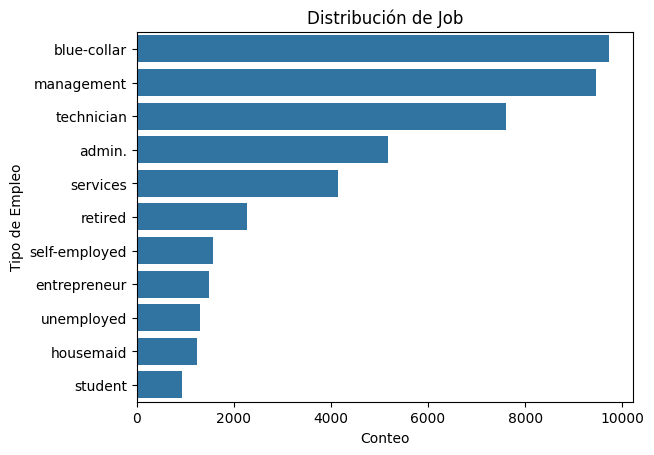

In [225]:
#categorias variables missings
sns.countplot(data=df, y='job', order=df['job'].value_counts().index)
plt.title('Distribución de Job')
plt.xlabel('Conteo')
plt.ylabel('Tipo de Empleo')
plt.show()

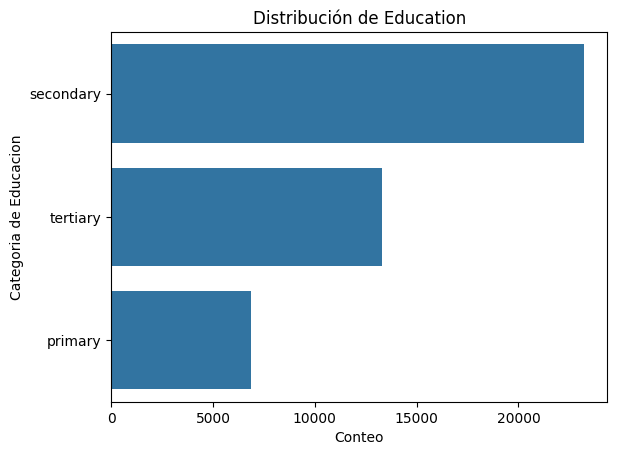

In [226]:
sns.countplot(data=df, y='education', order=df['education'].value_counts().index)  # noqa: E501
plt.title('Distribución de Education')
plt.xlabel('Conteo')
plt.ylabel('Categoria de Educacion')
plt.show()

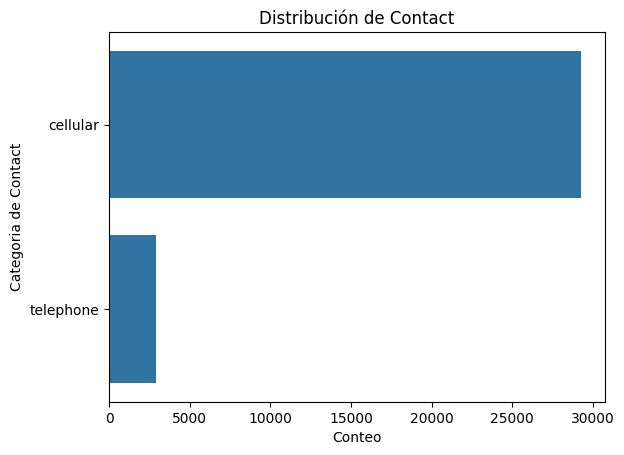

In [227]:
sns.countplot(data=df, y='contact', order=df['contact'].value_counts().index)
plt.title('Distribución de Contact')
plt.xlabel('Conteo')
plt.ylabel('Categoria de Contact')
plt.show()

#los missings parece ser que no hubo contacto

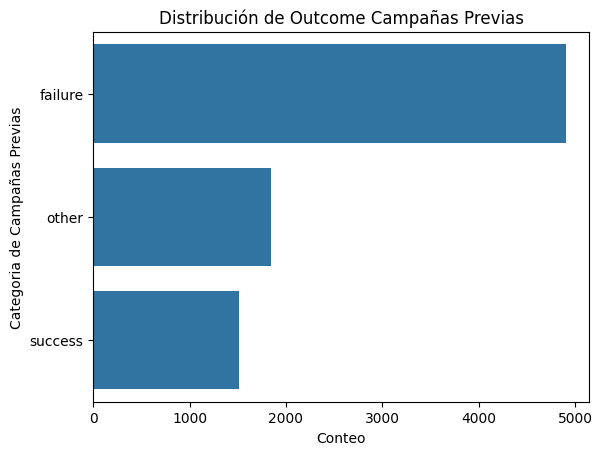

In [228]:
sns.countplot(data=df, y='poutcome', order=df['poutcome'].value_counts().index)
plt.title('Distribución de Outcome Campañas Previas')
plt.xlabel('Conteo')
plt.ylabel('Categoria de Campañas Previas')
plt.show()

#los missings parece ser que no hay info del contacto

In [229]:
## job: ver si es aleatorio la asignación de missings o no, para ver si se
# puede reemplazar con la moda

job_missing_df = df[df['job'].isnull()]
job_missing_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
216,47,NaN,married,NaN,no,28,no,no,NaN,5,may,338,2,-1,0,NaN,no
354,59,NaN,divorced,NaN,no,27,no,no,NaN,5,may,347,3,-1,0,NaN,no
876,37,NaN,single,NaN,no,414,yes,no,NaN,7,may,131,1,-1,0,NaN,no
1072,29,NaN,single,primary,no,50,yes,no,NaN,7,may,50,2,-1,0,NaN,no


In [230]:
job_missing_df.select_dtypes(include=['int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
age,288.0,47.593750,10.775095,25.0,41.00,47.0,55.00,82.0
balance,288.0,1772.357639,2970.288559,-295.0,170.75,677.0,2165.50,19706.0
day_of_week,288.0,14.642361,8.630261,1.0,6.00,14.0,20.25,31.0
duration,288.0,237.611111,226.115296,8.0,87.75,165.0,311.00,1487.0
campaign,288.0,3.309028,3.788621,1.0,1.00,2.0,4.00,35.0
pdays,288.0,20.982639,75.652767,-1.0,-1.00,-1.0,-1.00,683.0
previous,288.0,0.319444,1.089403,0.0,0.00,0.0,0.00,7.0


In [231]:
job_missing_df.select_dtypes(include=['object']).describe().T


,count,unique,top,freq
job,0,0,NaN,NaN
marital,288,3,married,203
education,161,3,secondary,71
default,288,2,no,286
housing,288,2,no,262
loan,288,2,no,284
contact,177,2,cellular,131
month,288,12,jun,90
poutcome,33,3,failure,20
y,288,2,no,254


pareciera que job no es eteramente random, pues la edad y el balance en euros es mayor en este data set que en la original.

In [232]:
moda_job = df['job'].mode()[0]
df['job'] = df['job'].fillna(moda_job)

In [233]:
## education tiene solo 3 categorias y la mayoría es secundary (casi la mitad)
education_missing_df = df[df['education'].isnull()]
education_missing_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,blue-collar,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
13,58,technician,married,NaN,no,71,yes,no,NaN,5,may,71,1,-1,0,NaN,no
16,45,admin.,single,NaN,no,13,yes,no,NaN,5,may,98,1,-1,0,NaN,no
42,60,blue-collar,married,NaN,no,104,yes,no,NaN,5,may,22,1,-1,0,NaN,no


In [234]:
education_missing_df.select_dtypes(include=['int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
age,1857.0,44.510501,12.196400,18.0,36.0,45.0,53.0,93.0
balance,1857.0,1526.754443,3152.228273,-1445.0,106.0,568.0,1699.0,64343.0
day_of_week,1857.0,15.810985,8.689590,1.0,8.0,16.0,22.0,31.0
duration,1857.0,257.313947,245.622775,4.0,99.0,180.0,332.0,2429.0
campaign,1857.0,2.849219,3.778611,1.0,1.0,2.0,3.0,63.0
pdays,1857.0,36.856220,95.226077,-1.0,-1.0,-1.0,-1.0,687.0
previous,1857.0,0.488422,1.569167,0.0,0.0,0.0,0.0,27.0


In [235]:
education_missing_df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
job,1857,11,blue-collar,581
marital,1857,3,married,1160
education,0,0,NaN,NaN
default,1857,2,no,1825
housing,1857,2,no,1037
loan,1857,2,no,1724
contact,1180,2,cellular,990
month,1857,12,may,556
poutcome,323,3,failure,177
y,1857,2,no,1605


Al igual que job pareciera que no es eteramente random, pues la edad y el balance en euros es mayor en este data set que en la original. Se va a imputar con la moda por mientras

In [236]:
moda_education = df['education'].mode()[0]
df['education'] = df['education'].fillna(moda_education)

In [237]:
#contact tiene hartos missings (casi 30% del dataset). En el histograma se
#vio que tal vez es porque no hay info del contacto

contact_missing_df = df[df['contact'].isnull()]
contact_missing_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,secondary,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,blue-collar,single,secondary,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [238]:
contact_missing_df.select_dtypes(include=['int64']).describe().T

#cambia demasiado pdays, se confirma hipotesis

,count,mean,std,min,25%,50%,75%,max
age,13020.0,40.600077,9.439221,20.0,33.0,39.0,48.00,61.0
balance,13020.0,1183.550384,2638.647690,-3372.0,50.0,389.0,1255.25,58544.0
day_of_week,13020.0,15.360138,8.454077,1.0,8.0,15.0,21.00,31.0
duration,13020.0,252.340476,258.405545,0.0,101.0,178.0,311.00,3881.0
campaign,13020.0,2.787481,3.371954,1.0,1.0,2.0,3.00,63.0
pdays,13020.0,1.299386,36.451647,-1.0,-1.0,-1.0,-1.00,850.0
previous,13020.0,0.021966,0.502526,0.0,0.0,0.0,0.00,41.0


In [239]:
contact_missing_df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
job,13020,11,blue-collar,4076
marital,13020,3,married,8031
education,13020,3,secondary,7826
default,13020,2,no,12731
housing,13020,2,yes,9357
loan,13020,2,no,10988
contact,0,0,NaN,NaN
month,13020,12,may,7975
poutcome,70,3,failure,31
y,13020,2,no,12490


Se mantiene la idea que contact missing es que no se pudo contactar, bastante parecida el dataset en variables de edad y balance pero aparece mucho pdays -1 (no hubo contacto previo). Se va a imputar con "no contact info".

In [240]:
df['contact'] = df['contact'].fillna('no_contact_info')

In [241]:
#poutcome tiene hartos missings (casi 80% del dataset). En el histograma se
#vio que tal vez es porque no hubo campaña previa.

poutcome_missing_df = df[df['poutcome'].isnull()]
poutcome_missing_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,no_contact_info,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,no_contact_info,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,no_contact_info,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,secondary,no,1506,yes,no,no_contact_info,5,may,92,1,-1,0,NaN,no
4,33,blue-collar,single,secondary,no,1,no,no,no_contact_info,5,may,198,1,-1,0,NaN,no


In [242]:
poutcome_missing_df.select_dtypes(include=['int64']).describe().T

#cambia demasiado pdays (cercano a 0)

,count,mean,std,min,25%,50%,75%,max
age,36959.0,40.932114,10.430504,18.0,33.0,39.0,49.0,95.0
balance,36959.0,1318.722043,3039.386767,-8019.0,55.0,414.0,1358.0,102127.0
day_of_week,36959.0,16.145621,8.372530,1.0,9.0,17.0,22.0,31.0
duration,36959.0,257.738332,262.266179,0.0,101.0,177.0,318.0,4918.0
campaign,36959.0,2.921886,3.325601,1.0,1.0,2.0,3.0,63.0
pdays,36959.0,-0.962039,3.778887,-1.0,-1.0,-1.0,-1.0,528.0
previous,36959.0,0.000460,0.047388,0.0,0.0,0.0,0.0,7.0


In [243]:
poutcome_missing_df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
job,36959,11,blue-collar,8370
marital,36959,3,married,22472
education,36959,3,secondary,20485
default,36959,2,no,36201
housing,36959,2,yes,19990
loan,36959,2,no,30836
contact,36959,3,cellular,21734
month,36959,12,may,11252
poutcome,0,0,NaN,NaN
y,36959,2,no,33573


Se mantiene la idea que poutcome missing es que no se hubo campaña previa, bastante parecida el dataset en variables de edad y balance pero aparece mucho pdays -1 (no hubo contacto previo). Se va a imputar con "no previous campaign".

In [244]:
df['poutcome'] = df['poutcome'].fillna('no_previous_campaign')




---


Se modificaron las variables missings job, education, contact y poutcome pertinentemente. Con job y education se imputó con la moda (ya que eran variables categoricas que aparecián con mucha frecuencia y no distorsionaba mucho el data set). Con contact y poutcome se intuyó que los valores missings significaban que no hay info de contacto (tal vez clientes no contestaron la llamada) y que no hubo campaña previa (no se contactaron con el cliente anteriormente). Eso se refleja porque pdays es en su mayoría -1 en ambas variables (no hubo contacto previo)


---

### Pregunta 1.2


Genere histogramas de las variables categóricas desagregando por la variable objetivo de interés. Interprete las relaciones que observa.

Responda: ¿Cuáles creen que son las variables categóricas más relevantes a la hora de determinar si el individuo hará un depósito?

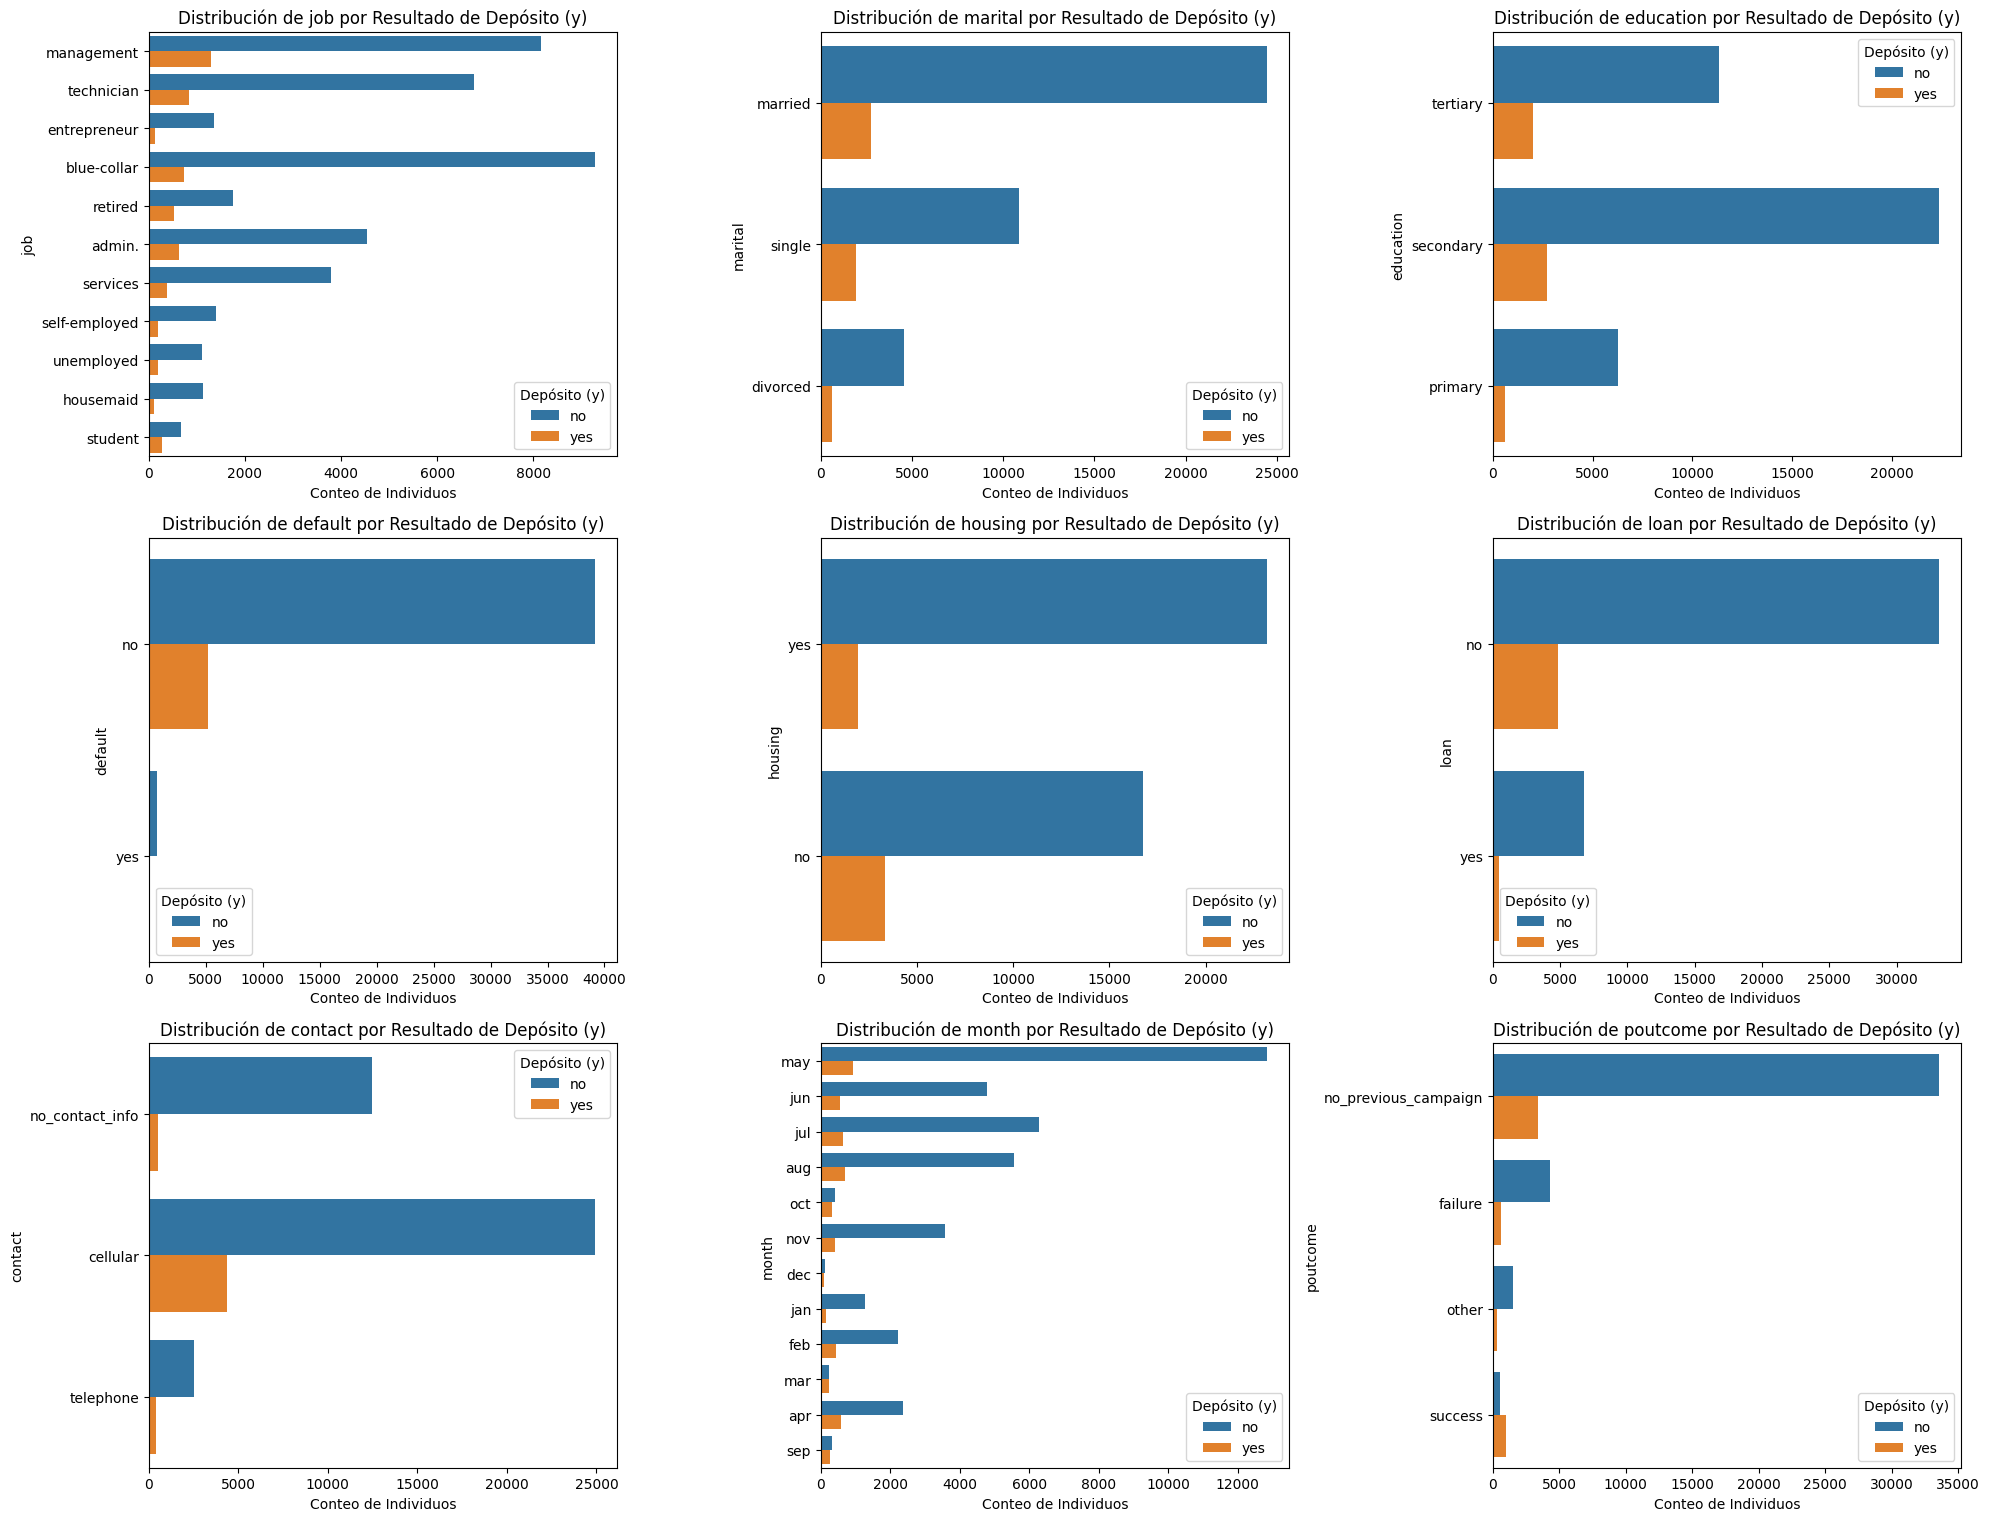

In [245]:
columnas_categoricas = [
    'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'poutcome'
]

plt.figure(figsize=(20, 25)) # Ajusta el tamaño total de la figura

for i, col in enumerate(columnas_categoricas):
    plt.subplot(5, 3, i + 1) # Organiza los subplots
    cross_tab_prop = pd.crosstab(df[col], df['y'], normalize='index')
    sns.countplot(
        data=df,
        y=col,            # Variable categórica en el eje Y
        hue='y',          # Desagregar por la variable objetivo 'y'
    )
    plt.title(f'Distribución de {col} por Resultado de Depósito (y)')
    plt.xlabel('Conteo de Individuos')
    plt.ylabel(col)
    plt.legend(title='Depósito (y)')

plt.tight_layout()
plt.show()



In [246]:
for col in columnas_categoricas:
    cross_tab_prop_numeric = pd.crosstab(df[col], df['y'], normalize='index')
    print(f"\nProporción para '{col}' (%):")
    print((cross_tab_prop_numeric[['yes', 'no']].apply(lambda x: x * 100).round(2))) # noqa: E501


Proporción para 'job' (%):
y                yes     no
job                        
admin.         12.20  87.80
blue-collar     7.41  92.59
entrepreneur    8.27  91.73
housemaid       8.79  91.21
management     13.76  86.24
retired        22.79  77.21
self-employed  11.84  88.16
services        8.88  91.12
student        28.68  71.32
technician     11.06  88.94
unemployed     15.50  84.50

Proporción para 'marital' (%):
y           yes     no
marital               
divorced  11.95  88.05
married   10.12  89.88
single    14.95  85.05

Proporción para 'education' (%):
y            yes     no
education              
primary     8.63  91.37
secondary  10.78  89.22
tertiary   15.01  84.99

Proporción para 'default' (%):
y          yes     no
default              
no       11.80  88.20
yes       6.38  93.62

Proporción para 'housing' (%):
y         yes    no
housing            
no       16.7  83.3
yes       7.7  92.3

Proporción para 'loan' (%):
y       yes     no
loan              
no    12




---

1. Job: managmenent es el que tiene más individuos que se suscriben en cantidad (casi 2000 personas), pero en porcentaje student es el que más se suscribe (28%)

2. Marital: married es el que tiene más individuos que se suscriben en cantidad (casi 5000 personas), pero en porcentaje single es el que más se suscribe (15%)

3. Education: secondary es el que tiene más individuos que se suscriben en cantidad, seguido por muy cerca con tertiary(casi 5000 personas), y en porcentaje tertiary es el que más se suscribe (15%), de igual manera secondary tiene un porcentaje bien parecido (11%)

4. Default: cuando se experimenta default, casi todos NO se suscriben tanto en porcentaje (93%) como en cantidad de personas.

5. Housing: cuando hay credito hipotecario, casi todos NO se suscriben tanto en porcentaje (92%) como en cantidad de personas

6. Loan: cuando hay creditos personales, casi todos NO se suscriben tanto en porcentaje (93%) como en cantidad de personas

7. Contact: celular es el que tiene más individuos que se suscriben en cantidad (casi 5000 personas y en porcentaje (15%)

8. Month: mayo es el que tiene más individuos que se suscriben en cantidad (casi 2000 personas),  pero representa muy poco en porcentaje (7%) y en cambio marzo es el que más se suscribe (52%)

9. Poutcome: no_preview_campaign es el que tiene más individuos que se suscriben en cantidad (casi 5000 personas). Pero eso representa muy poco en porcentaje (10%) y en general si la campaña anterior fue exitosa, la personas volvera a realizar un deposito (65%)

---

---

Las variables categóricas más relevantes a la hora de determinar si el individuo hará un depósito son que no haya hecho default, que no tenga creditos (hipotecario o personal) y que se contacten via celular

---

### Pregunta 1.3

Identifique _outliers_ entre las variables numéricas del dataset. Además, impute estas observaciones si usted lo considera necesario. Justifique su decisión.

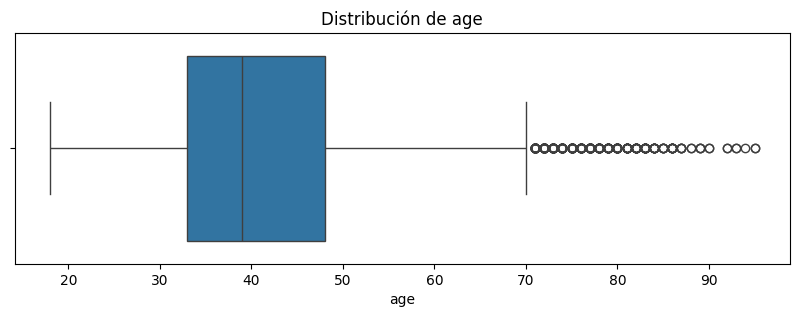

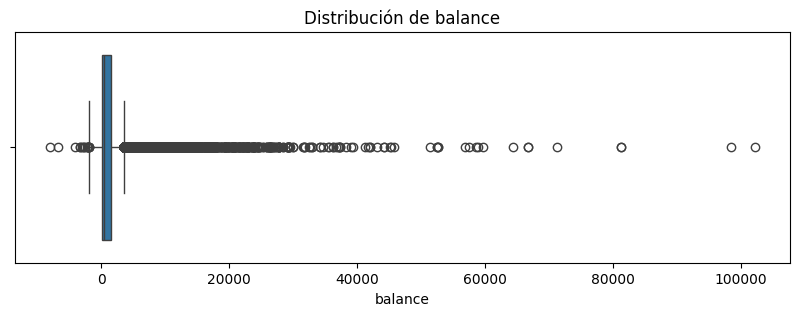

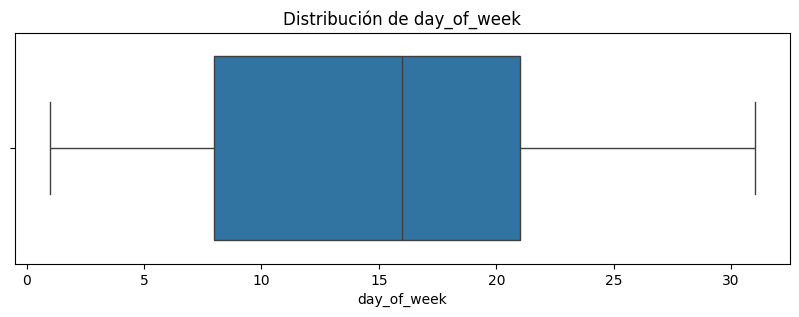

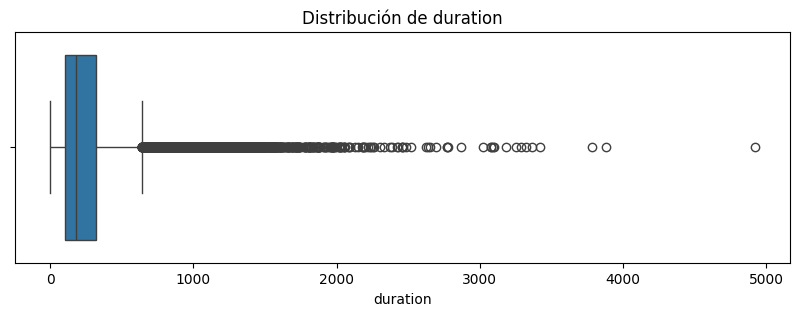

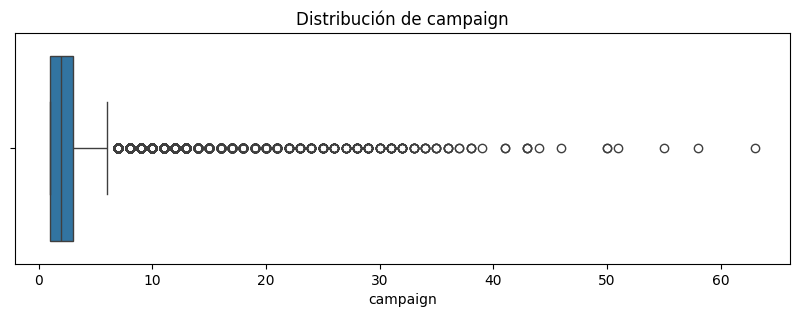

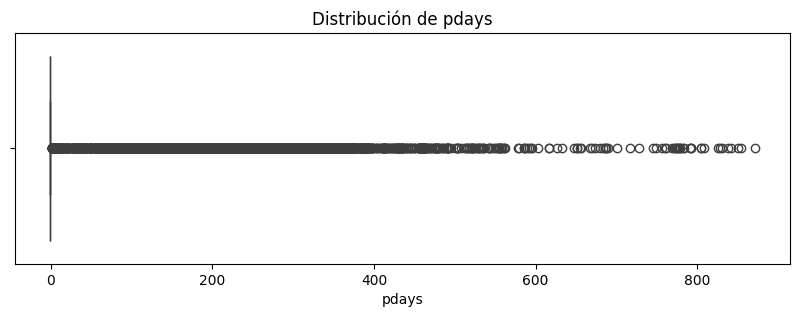

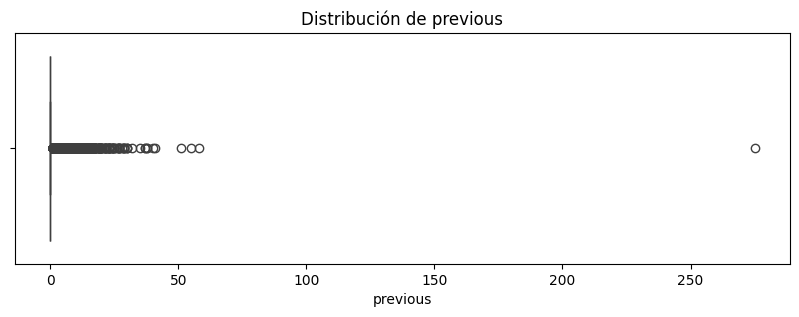

In [247]:
columnas_numericas = ['age', 'balance', 'day_of_week', 'duration',
                      'campaign', 'pdays', 'previous']

for col in columnas_numericas:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.show()

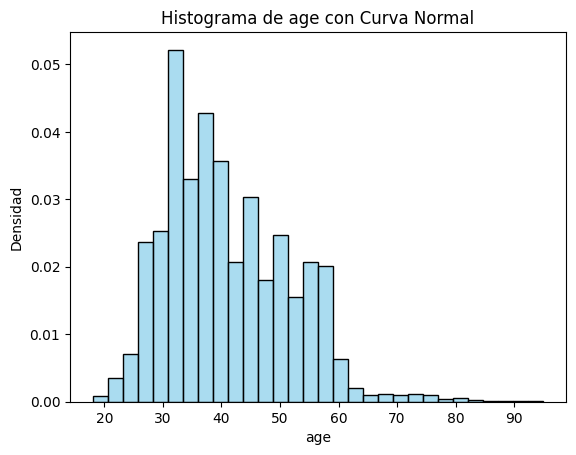

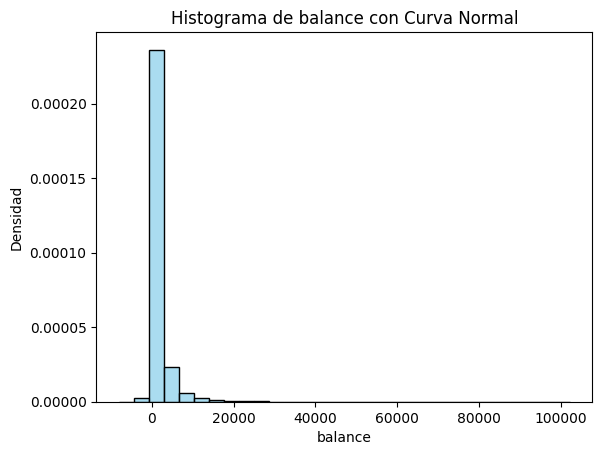

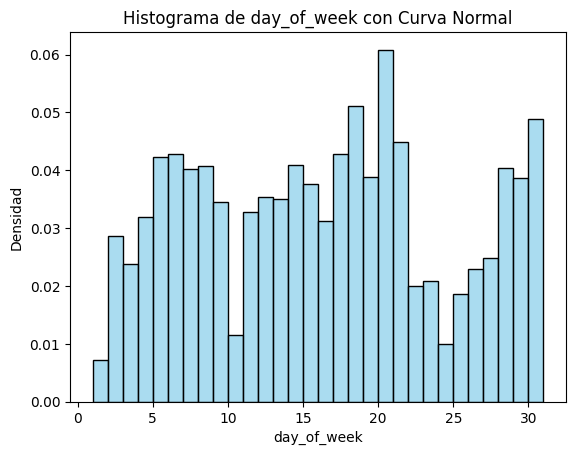

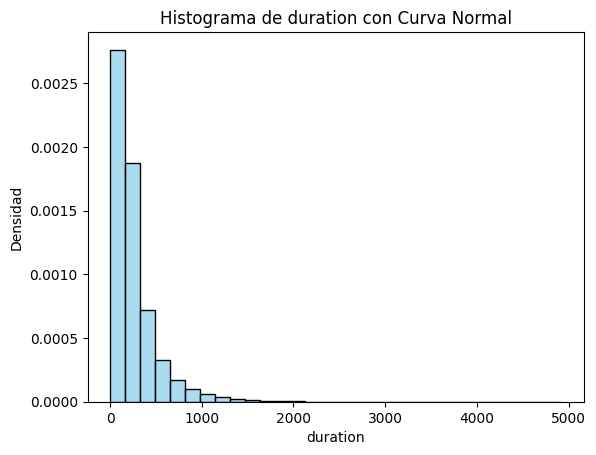

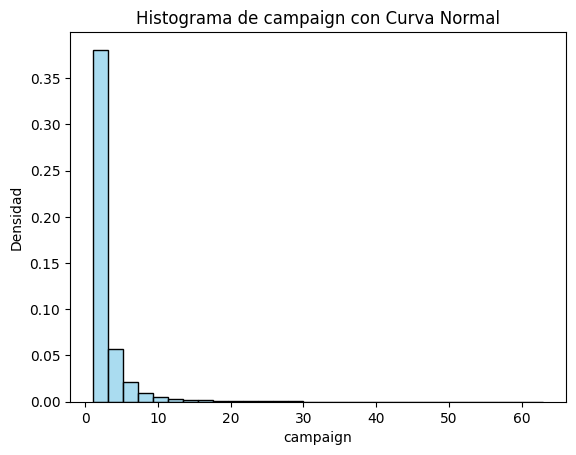

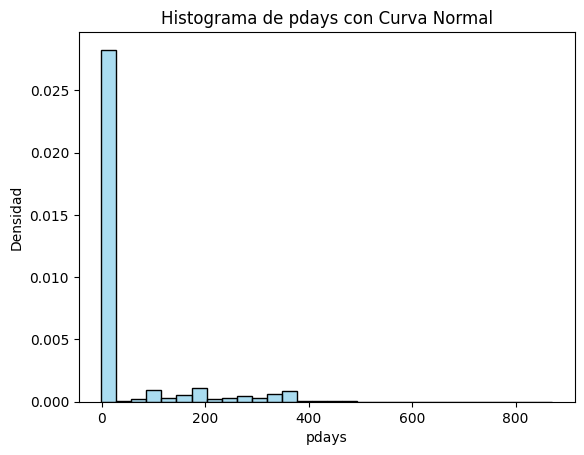

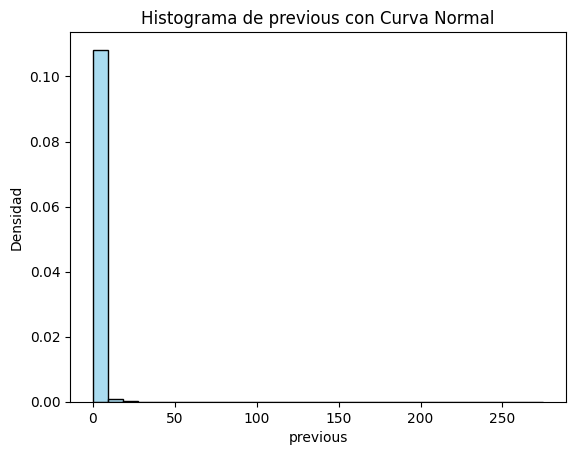

In [248]:
for col_name in columnas_numericas:
    sns.histplot(df[col_name], bins=30, stat='density', alpha=0.7, color='skyblue', edgecolor='black')  # type: ignore # noqa: E501

    plt.title(f'Histograma de {col_name} con Curva Normal')
    plt.xlabel(col_name)
    plt.ylabel('Densidad')
    plt.show() # Muestra el gráfico actual

In [249]:
#age

outlier = 70
mayores_70 = df[df['age'] > outlier]
mayores_70.info()

<class 'pandas.core.frame.DataFrame'>
Index: 487 entries, 29158 to 45208
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          487 non-null    int64 
 1   job          487 non-null    object
 2   marital      487 non-null    object
 3   education    487 non-null    object
 4   default      487 non-null    object
 5   balance      487 non-null    int64 
 6   housing      487 non-null    object
 7   loan         487 non-null    object
 8   contact      487 non-null    object
 9   day_of_week  487 non-null    int64 
 10  month        487 non-null    object
 11  duration     487 non-null    int64 
 12  campaign     487 non-null    int64 
 13  pdays        487 non-null    int64 
 14  previous     487 non-null    int64 
 15  poutcome     487 non-null    object
 16  y            487 non-null    object
dtypes: int64(7), object(10)
memory usage: 68.5+ KB


In [250]:
proportion = (len(mayores_70) / len(df))*100
print(proportion) #representa 1% de los datos, pero es un segmento "real"
#de personas, se reemplezara con el 1.5IQR

1.0771714848156422


In [251]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

upper_fence = Q3 + 1.5 * IQR

df['age'] = np.where(df['age'] > upper_fence, upper_fence, df['age'])

In [252]:
#balance

Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

upper_fence = Q3 + 1.5 * IQR
lower_fence = Q1 - 1.5*IQR

outliers_balance = df[((df['balance'] < lower_fence) |
                       (df['balance'] > upper_fence))]
outliers_balance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4729 entries, 34 to 45208
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          4729 non-null   float64
 1   job          4729 non-null   object 
 2   marital      4729 non-null   object 
 3   education    4729 non-null   object 
 4   default      4729 non-null   object 
 5   balance      4729 non-null   int64  
 6   housing      4729 non-null   object 
 7   loan         4729 non-null   object 
 8   contact      4729 non-null   object 
 9   day_of_week  4729 non-null   int64  
 10  month        4729 non-null   object 
 11  duration     4729 non-null   int64  
 12  campaign     4729 non-null   int64  
 13  pdays        4729 non-null   int64  
 14  previous     4729 non-null   int64  
 15  poutcome     4729 non-null   object 
 16  y            4729 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 665.0+ KB


In [253]:
proportion = (len(outliers_balance) / len(df))*100
print(proportion) #es un 10% de los datos, los datos outliers
#es que la persona en promedio tiene deuda. Sí importan esos datos, por lo
# que también se reemplazan por el 1.5IQR

10.459843843312468


In [254]:
df['balance'] = np.where(df['balance'] > upper_fence, upper_fence, df['balance'])  # noqa: E501
df['balance'] = np.where( df['balance'] < lower_fence, lower_fence, df['balance']) # noqa: E501

In [255]:
#duration

Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

upper_fence = Q3 + 1.5 * IQR

mayor_duration = df[df['duration'] > upper_fence]
mayor_duration.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3235 entries, 37 to 45208
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          3235 non-null   float64
 1   job          3235 non-null   object 
 2   marital      3235 non-null   object 
 3   education    3235 non-null   object 
 4   default      3235 non-null   object 
 5   balance      3235 non-null   float64
 6   housing      3235 non-null   object 
 7   loan         3235 non-null   object 
 8   contact      3235 non-null   object 
 9   day_of_week  3235 non-null   int64  
 10  month        3235 non-null   object 
 11  duration     3235 non-null   int64  
 12  campaign     3235 non-null   int64  
 13  pdays        3235 non-null   int64  
 14  previous     3235 non-null   int64  
 15  poutcome     3235 non-null   object 
 16  y            3235 non-null   object 
dtypes: float64(2), int64(5), object(10)
memory usage: 454.9+ KB


In [256]:
proportion = (len(mayor_duration) / len(df))*100
print(proportion) #es un 7% de los datos, los datos outliers
#es que dura harto la llamada. Sí importan esos datos, por lo
# que también se reemplazan por el 1.5IQR

7.155338302625467


In [257]:
df['duration'] = np.where(df['duration'] > upper_fence, upper_fence, df['duration'])  # noqa: E501

In [258]:
#campaign

outlier = 8
mayor_8 = df[df['campaign'] > outlier]
mayor_8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1789 entries, 1483 to 44886
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1789 non-null   float64
 1   job          1789 non-null   object 
 2   marital      1789 non-null   object 
 3   education    1789 non-null   object 
 4   default      1789 non-null   object 
 5   balance      1789 non-null   float64
 6   housing      1789 non-null   object 
 7   loan         1789 non-null   object 
 8   contact      1789 non-null   object 
 9   day_of_week  1789 non-null   int64  
 10  month        1789 non-null   object 
 11  duration     1789 non-null   float64
 12  campaign     1789 non-null   int64  
 13  pdays        1789 non-null   int64  
 14  previous     1789 non-null   int64  
 15  poutcome     1789 non-null   object 
 16  y            1789 non-null   object 
dtypes: float64(3), int64(4), object(10)
memory usage: 251.6+ KB


In [259]:
proportion = (len(mayor_8) / len(df))*100
print(proportion) #4% de los datos, los datos outliers
#es que la campaña se hace muchas veces al cliente. Sí importan esos datos,
# por lo que también se reemplazan por el 1.5IQR

3.957001614651302


In [260]:
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1

upper_fence = Q3 + 1.5 * IQR
df['campaign'] = (np.where(df['campaign'] > upper_fence,
                           upper_fence, df['campaign']))

In [261]:
#pdays

outlier = 90
mayor_90 = df[df['pdays'] > outlier]
mayor_90.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7539 entries, 24060 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          7539 non-null   float64
 1   job          7539 non-null   object 
 2   marital      7539 non-null   object 
 3   education    7539 non-null   object 
 4   default      7539 non-null   object 
 5   balance      7539 non-null   float64
 6   housing      7539 non-null   object 
 7   loan         7539 non-null   object 
 8   contact      7539 non-null   object 
 9   day_of_week  7539 non-null   int64  
 10  month        7539 non-null   object 
 11  duration     7539 non-null   float64
 12  campaign     7539 non-null   float64
 13  pdays        7539 non-null   int64  
 14  previous     7539 non-null   int64  
 15  poutcome     7539 non-null   object 
 16  y            7539 non-null   object 
dtypes: float64(4), int64(3), object(10)
memory usage: 1.0+ MB


In [262]:
proportion = (len(mayor_90) / len(df))*100
print(proportion)

#muchos datos son outliers (mas 15%) y -1 representa que nunca lo
#contactaron antes. Se va a intentar resolver como logaritmo

16.675145429209707


In [263]:
df['log(pdays)'] = np.where(df['pdays'] == -1, np.log(1), np.log(df['pdays']))

#se transforma a logaritmo y cuando "no lo llamamos" va a salir como 0

/Users/catamege/Desktop/Uni/9vo semestre/Machine learning/Tarea2-Mege-Lantadilla/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


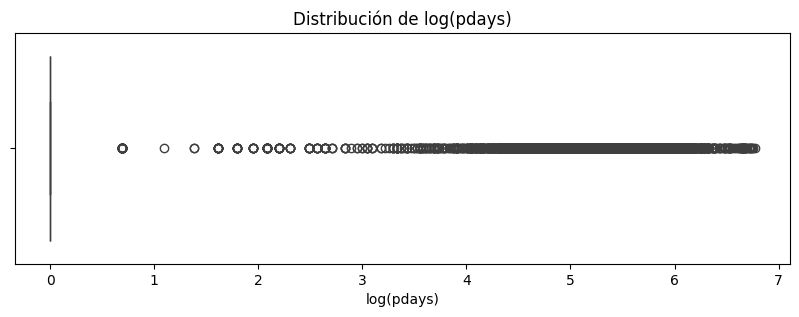

In [264]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['log(pdays)'])
plt.title('Distribución de log(pdays)')
plt.xlabel('log(pdays)')
plt.show()

#todo se concentra en un punto, mejor usar categorica

In [265]:
tramo1=-1
tramo2=0
tramo3=180
tramo4=365
tramos = [
    (df['pdays'] == tramo1),
    (df['pdays'] > tramo2) & (df['pdays'] <= tramo3),
    (df['pdays'] > tramo3) & (df['pdays'] <= tramo4),
    (df['pdays'] > tramo4)
]

# Definir las etiquetas correspondientes a las condiciones
categorias = [
    'no lo llamamos',
    '6 meses',
    '1 año',
    '+1 año',
]


df['pdays_categorias'] = np.select(tramos, categorias, default='False')

In [266]:
df['pdays_categorias'].value_counts() #la categoria que tiene menos es de 1 año
# y es del 1%

pdays_categorias
no lo llamamos    36954
1 año              4416
6 meses            3198
+1 año              643
Name: count, dtype: int64

In [267]:
#previous

Q1 = df['previous'].quantile(0.25)
Q3 = df['previous'].quantile(0.75)
IQR = Q3 - Q1

upper_fence = Q3 + 1.5 * IQR

mayor_previous = df[df['previous'] > upper_fence]
mayor_previous.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8257 entries, 24060 to 45210
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8257 non-null   float64
 1   job               8257 non-null   object 
 2   marital           8257 non-null   object 
 3   education         8257 non-null   object 
 4   default           8257 non-null   object 
 5   balance           8257 non-null   float64
 6   housing           8257 non-null   object 
 7   loan              8257 non-null   object 
 8   contact           8257 non-null   object 
 9   day_of_week       8257 non-null   int64  
 10  month             8257 non-null   object 
 11  duration          8257 non-null   float64
 12  campaign          8257 non-null   float64
 13  pdays             8257 non-null   int64  
 14  previous          8257 non-null   int64  
 15  poutcome          8257 non-null   object 
 16  y                 8257 non-null   object 


In [268]:
proportion = (len(mayor_previous) / len(df))*100
print(proportion) #misma idea, se intentará arreglarlo con log y
# sino con categorica

18.263254517705867


In [269]:
df['log(previous)'] = np.where(df['previous'] == 0, 0, np.log(df['previous']))

/Users/catamege/Desktop/Uni/9vo semestre/Machine learning/Tarea2-Mege-Lantadilla/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


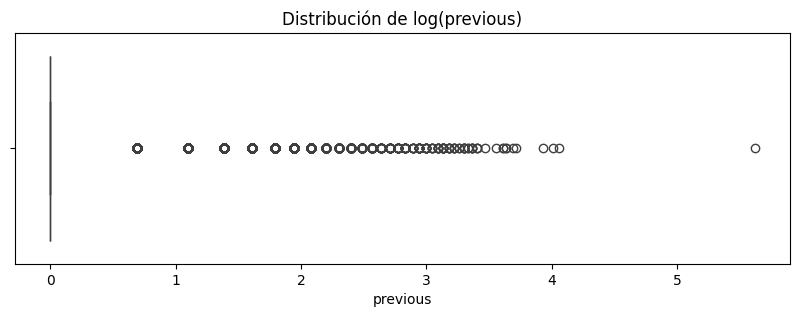

In [270]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['log(previous)'])
plt.title('Distribución de log(previous)')
plt.xlabel(col)
plt.show()

#todo se concentra en un punto, mejor usar categorica

In [271]:
tramo1=0
tramo2=5
tramo3=10
tramo4=50

tramos = [
    (df['previous'] == tramo1),
    (df['previous'] > tramo1) & (df['previous'] <= tramo2),
    (df['previous'] > tramo2) & (df['previous'] <= tramo3),
    (df['previous'] > tramo3) & (df['previous'] <= tramo4),
    (df['previous'] > tramo4)
]

# Definir las etiquetas correspondientes a las condiciones
categorias = [
    'no han llamado antes',
    '5 veces',
    '10 veces',
    '50 veces',
    '+50 veces'
]

df['previous_categorias'] = np.select(tramos, categorias, default='False')

In [272]:
df['previous_categorias'].value_counts()

previous_categorias
no han llamado antes    36954
5 veces                  7193
10 veces                  770
50 veces                  290
+50 veces                   4
Name: count, dtype: int64

In [273]:
df = df[df['previous_categorias'] != '+50 veces']

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45207 non-null  float64
 1   job                  45207 non-null  object 
 2   marital              45207 non-null  object 
 3   education            45207 non-null  object 
 4   default              45207 non-null  object 
 5   balance              45207 non-null  float64
 6   housing              45207 non-null  object 
 7   loan                 45207 non-null  object 
 8   contact              45207 non-null  object 
 9   day_of_week          45207 non-null  int64  
 10  month                45207 non-null  object 
 11  duration             45207 non-null  float64
 12  campaign             45207 non-null  float64
 13  pdays                45207 non-null  int64  
 14  previous             45207 non-null  int64  
 15  poutcome             45207 non-null  obje




---

Se hicieron distintas maneras de tratar los valores outliers, para age, balance, duration, campaign se cambiaron los valores por un upper/lower fence para mantener la estructura de la data y no alterar a las caracteristicas de los individuos. Para pdays y previous se volvieron variables categoricas pues muchos valores se concentraban en un solo número y unos pocos estaban muy dispersos, por lo que al intentar arreglarlo todo se iba a un solo valor. Además, intuitivamente tenia mas sentido (si me llaman 1 vez o 2 veces no cambia mi preferencia de elegir o no el depósito). Notar que se borro los casos donde se han contactado más de 50 veces a la persona en campañas anteriores pues eran casos muy inusuales (4 en 45000+ individuos). Finalmente day of week no se tenía outliers asi que no se arregló


---

## Feature Engineering

### Pregunta 1.4

 Cree un _pipeline_ de preprocesamiento con las siguientes transformaciones a las columnas correspondientes:

*   **Columnas Numéricas** : Aplique un `StandardScaler` para estandarizar estas variables.
*   **Columnas Categóricas Binarias** : Aplique `OneHotEncoder` para crear variables dummy. Asegúrese de manejar posibles categorías desconocidas durante la transformación.
*   **Columnas a Eliminar** : Elimine columnas que dejan de ser relavantes luego de las trasformaciones.
*  **Columnas Dummies MultiNivel** : cree columnas dummies para las variables multi categoricas (tomando codificadas a 0s y 1s =, para su respctiva categoria)
*  **Columnas Label Encoding MultiNivel** : Dentro de las columnas multinivel hay 2 columnas que presentan un orden natural. e.g. en la columna 'month' tenemos que 'jan' < 'feb' < 'dec'. Aplique en la columna 'month' y otra columna que deberá determinar usted un label encoder que capture ese ordenamiento natural, luego normalice con un minmax scaler para que las columnas varien entre 0 y 1.


Una vez creado el pipeline, aplíquelo a su conjunto de features (`X`). Muestre la forma (_shape_) del dataset original y del dataset procesado para verificar los cambios. ¿Cuántas nuevas columnas hay?

Adicionalmente, elimine del análisis la variable `day_of_week`. Si considera necesario realizar transformaciones adicionales a las variables, realicelas en este punto.



In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45207 non-null  float64
 1   job                  45207 non-null  object 
 2   marital              45207 non-null  object 
 3   education            45207 non-null  object 
 4   default              45207 non-null  object 
 5   balance              45207 non-null  float64
 6   housing              45207 non-null  object 
 7   loan                 45207 non-null  object 
 8   contact              45207 non-null  object 
 9   day_of_week          45207 non-null  int64  
 10  month                45207 non-null  object 
 11  duration             45207 non-null  float64
 12  campaign             45207 non-null  float64
 13  pdays                45207 non-null  int64  
 14  previous             45207 non-null  int64  
 15  poutcome             45207 non-null  obje

In [275]:
columnas_numericas = ['age', 'balance', 'campaign']
#se eliminó pdays y previous (ahora se tratan como categoricas)
# y day of week (enunciado) y duration (enunciado)
columnas_categoricas = ['job', 'marital', 'education', 'contact', 'month',
                    'poutcome', 'pdays_categorias', 'previous_categorias']
columnas_dummies = ['default', 'housing', 'loan']

In [276]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
               'oct', 'nov', 'dec']
education_order = ['primary', 'secondary', 'tertiary']
pdays_order = ['no lo llamamos', '1 semana', '1 mes', '6 meses',
               '1 año', '+1 año']
previous_order = ['no han llamado antes', '5 veces', '10 veces', '50 veces',
                   '+50 veces']

In [277]:
processor = ColumnTransformer(
    transformers=[
        ('standard_scaler', StandardScaler(), columnas_numericas),
        ('bin_encoder', OneHotEncoder(), columnas_dummies),
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), columnas_categoricas), # type: ignore  # noqa: E501

        ('ord_education', Pipeline([
            ('encoder', OrdinalEncoder(categories=[education_order])),
            ('scaler', MinMaxScaler())
        ]), ['education']),

        ('ord_month', Pipeline([
            ('encoder', OrdinalEncoder(categories=[month_order])),
            ('scaler', MinMaxScaler())
        ]), ['month']),

        ('ord_pdays_cat', Pipeline([
            ('encoder', OrdinalEncoder(categories=[pdays_order])),
            ('scaler', MinMaxScaler())
        ]), ['pdays_categorias']),

        ('ord_previous_cat', Pipeline([
            ('encoder', OrdinalEncoder(categories=[previous_order])),
            ('scaler', MinMaxScaler())
        ]), ['previous_categorias'])
    ],
    remainder='drop'
)

In [278]:
X_pipeline = df.drop(columns=['y', 'pdays', 'log(pdays)', 'previous',
                              'log(previous)','day_of_week', 'duration'])

X_processed = processor.fit_transform(X_pipeline)

***SE BORRO DURATION, VER SI ES NECESARIO O NO***

In [279]:
print(f"Forma del dataset de features ANTES del procesador: {X_pipeline.shape}")
print(f"Forma del dataset procesado: {X_processed.shape}")

#57 columnas

Forma del dataset de features ANTES del procesador: (45207, 14)
Forma del dataset procesado: (45207, 57)


In [280]:
nombre_columnas = processor.get_feature_names_out()
print(f"Nombres de las columnas procesadas (ColumnTransformer): {nombre_columnas}")  # noqa: E501

Nombres de las columnas procesadas (ColumnTransformer): ['standard_scaler__age' 'standard_scaler__balance'
 'standard_scaler__campaign' 'bin_encoder__default_no'
 'bin_encoder__default_yes' 'bin_encoder__housing_no'
 'bin_encoder__housing_yes' 'bin_encoder__loan_no' 'bin_encoder__loan_yes'
 'one_hot_encoder__job_admin.' 'one_hot_encoder__job_blue-collar'
 'one_hot_encoder__job_entrepreneur' 'one_hot_encoder__job_housemaid'
 'one_hot_encoder__job_management' 'one_hot_encoder__job_retired'
 'one_hot_encoder__job_self-employed' 'one_hot_encoder__job_services'
 'one_hot_encoder__job_student' 'one_hot_encoder__job_technician'
 'one_hot_encoder__job_unemployed' 'one_hot_encoder__marital_divorced'
 'one_hot_encoder__marital_married' 'one_hot_encoder__marital_single'
 'one_hot_encoder__education_primary'
 'one_hot_encoder__education_secondary'
 'one_hot_encoder__education_tertiary' 'one_hot_encoder__contact_cellular'
 'one_hot_encoder__contact_no_contact_info'
 'one_hot_encoder__contact_teleph

In [281]:
y_target = df['y']

## Modelos

En esta sección aplicaremos los algoritmos de clasificación vistos en el curso. Específicamente, compararemos el rendimiento de los siguientes modelos:

*   _Decision Tree Classifier_
*   _Random Forest Classifier_
*   _XGBoost Classifier_
*   _Naïve Bayes_



### Pregunta 1.5

Divida el conjunto de datos en conjuntos de entrenamiento y de prueba. Analice la distribución de la variable objetivo en ambos conjuntos para determinar si el conjunto de datos está balanceado o no.

En caso de que el conjunto de datos no esté balanceado, asegúrese de que la división de _train_-_test_ respete el balance de las clases target para evitar que se genere un sesgo. Para esto, se recomienda leer la documentación oficial de la función `train_test_split()`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

Use la semilla `random_state` = 123.


In [282]:
balance = 0.5
is_balanced = y_target.value_counts(normalize=True).min() > balance
print(is_balanced)

False


In [283]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed,
    y_target,
    test_size=0.25,
    random_state=123,
    stratify= y_target
)

print(f"Forma del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Forma del conjunto de prueba (X_test): {X_test.shape}")
print(f"Forma del objetivo de entrenamiento (y_train): {y_train.shape}")
print(f"Forma del objetivo de prueba (y_test): {y_test.shape}")


print(f"Proporción de clases en y_train: {y_train.value_counts(normalize=True)}")  # noqa: E501
print(f"Proporción de clases en y_test: {y_test.value_counts(normalize=True)}")

Forma del conjunto de entrenamiento (X_train): (33905, 57)
Forma del conjunto de prueba (X_test): (11302, 57)
Forma del objetivo de entrenamiento (y_train): (33905,)
Forma del objetivo de prueba (y_test): (11302,)
Proporción de clases en y_train: y
no     0.883056
yes    0.116944
Name: proportion, dtype: float64
Proporción de clases en y_test: y
no     0.88303
yes    0.11697
Name: proportion, dtype: float64


### Pregunta 1.6

Entrene un árbol clasificador sin definir profundad máxima del árbol. Llamaremos a este, "modelo no regularizado".

Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `DecisionTreeClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.


Despliege el $F_1\ Score$ del modelo sobre la base de prueba. Luego, grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

In [284]:
modelo_no_regularizado = DecisionTreeClassifier(
    max_depth=None,
    class_weight='balanced',
    random_state=123
)

modelo_no_regularizado.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=123)

In [285]:
y_test_pred = modelo_no_regularizado.predict(X_test) #predigo con test
f1_test_no_regularizado = f1_score(y_test, y_test_pred, pos_label='yes')

print(f1_test_no_regularizado) #28%

0.28267254038179146


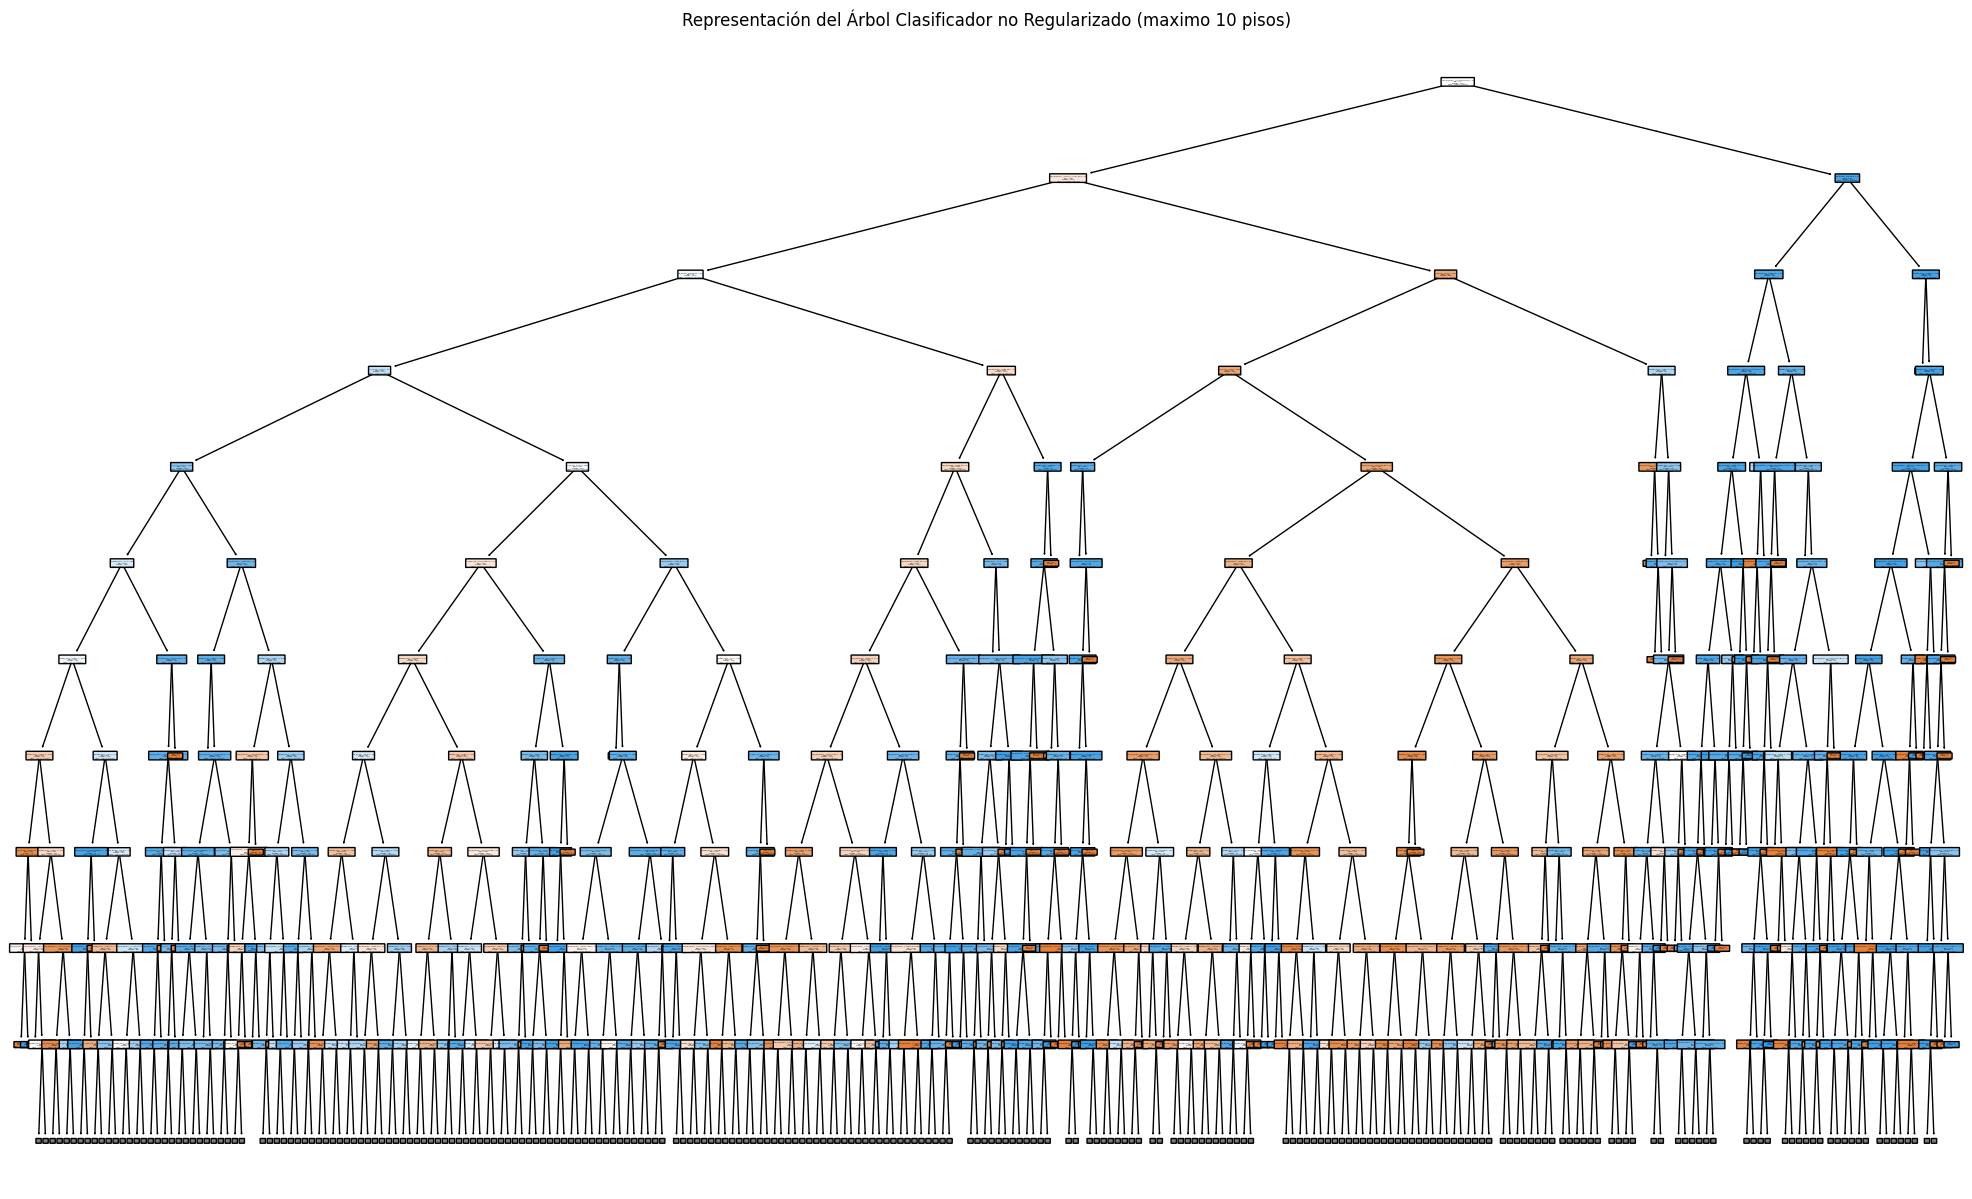

In [286]:
feature_names_out = processor.get_feature_names_out()
nombres = modelo_no_regularizado.classes_.astype(str) # type: ignore

plt.figure(figsize=(25, 15))
plot_tree(
    modelo_no_regularizado,
    filled=True,
    rounded=True,
    feature_names=feature_names_out, # type: ignore
    class_names=nombres, # type: ignore
    max_depth= 10
)
plt.title('Representación del Árbol Clasificador no Regularizado (maximo 10 pisos)')  # noqa: E501
plt.show()

#demasiado extenso el arbol por eso F1 es grande




---


El modelo problamente este con overfitting, es decir no generaliza los datos y "se aprendió de memoria" la clasificación


---


### Pegunta 1.7

En el contexto particular de una campaña de marketing, donde probablemente la mayoría de clientes no harán depósitos, es importante identificar correctamente tanto los clientes que harán depósitos (clase minoritaria), como los clientes que no harán depósitos.

En el primer caso, falsos negativos implican un cliente peridido. En el segundo caso, falsos positivos implicarían un gasto de marketing innecesario en clientes que no son de interés. En este sentido, si clasificamos a todos los clientes como individuos que no harán depósitos, el _accuracy_ será muy alto, pero el costo económico será muy grande.

Para penalizar tanto falsos positivos, como falsos negativos, a la vez que se busca maximizar los verdaderos positivos, nos enfocaremos en la métrica de _performance_ $F_1\ Score$.

Calcule el $F_1\ Score$ de su árbol no regularizado con la muestra correcta. ¿Considera que es un buen valor? Comente.

In [287]:
y_test_pred = modelo_no_regularizado.predict(X_test)
f1_test_no_regularizado = f1_score(y_test, y_test_pred, pos_label='yes')
print(f1_test_no_regularizado)

0.28267254038179146





---


El modelo tiene un F1 sobre el test de 0.44, es decir efectivamente hubo un overfitting. Si los falsos negativos y los falsos positivos son importantes entonces el modelo no es el correcto


---


### Pregunta 1.8

Entrene un árbol clasificador con profundad máxima del árbol igual a 16. Llamaremos a este, "modelo levemente regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de prueba.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

In [288]:
modelo_poco_regularizado = DecisionTreeClassifier(
    max_depth=16,
    class_weight='balanced',
    random_state=123
)

modelo_poco_regularizado.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=16, random_state=123)

In [289]:
y_test_pred = modelo_poco_regularizado.predict(X_test) #predigo con test
f1_test_poco_regularizado= f1_score(y_test, y_test_pred, pos_label='yes')

print(f1_test_poco_regularizado) #34%

0.3408408408408408


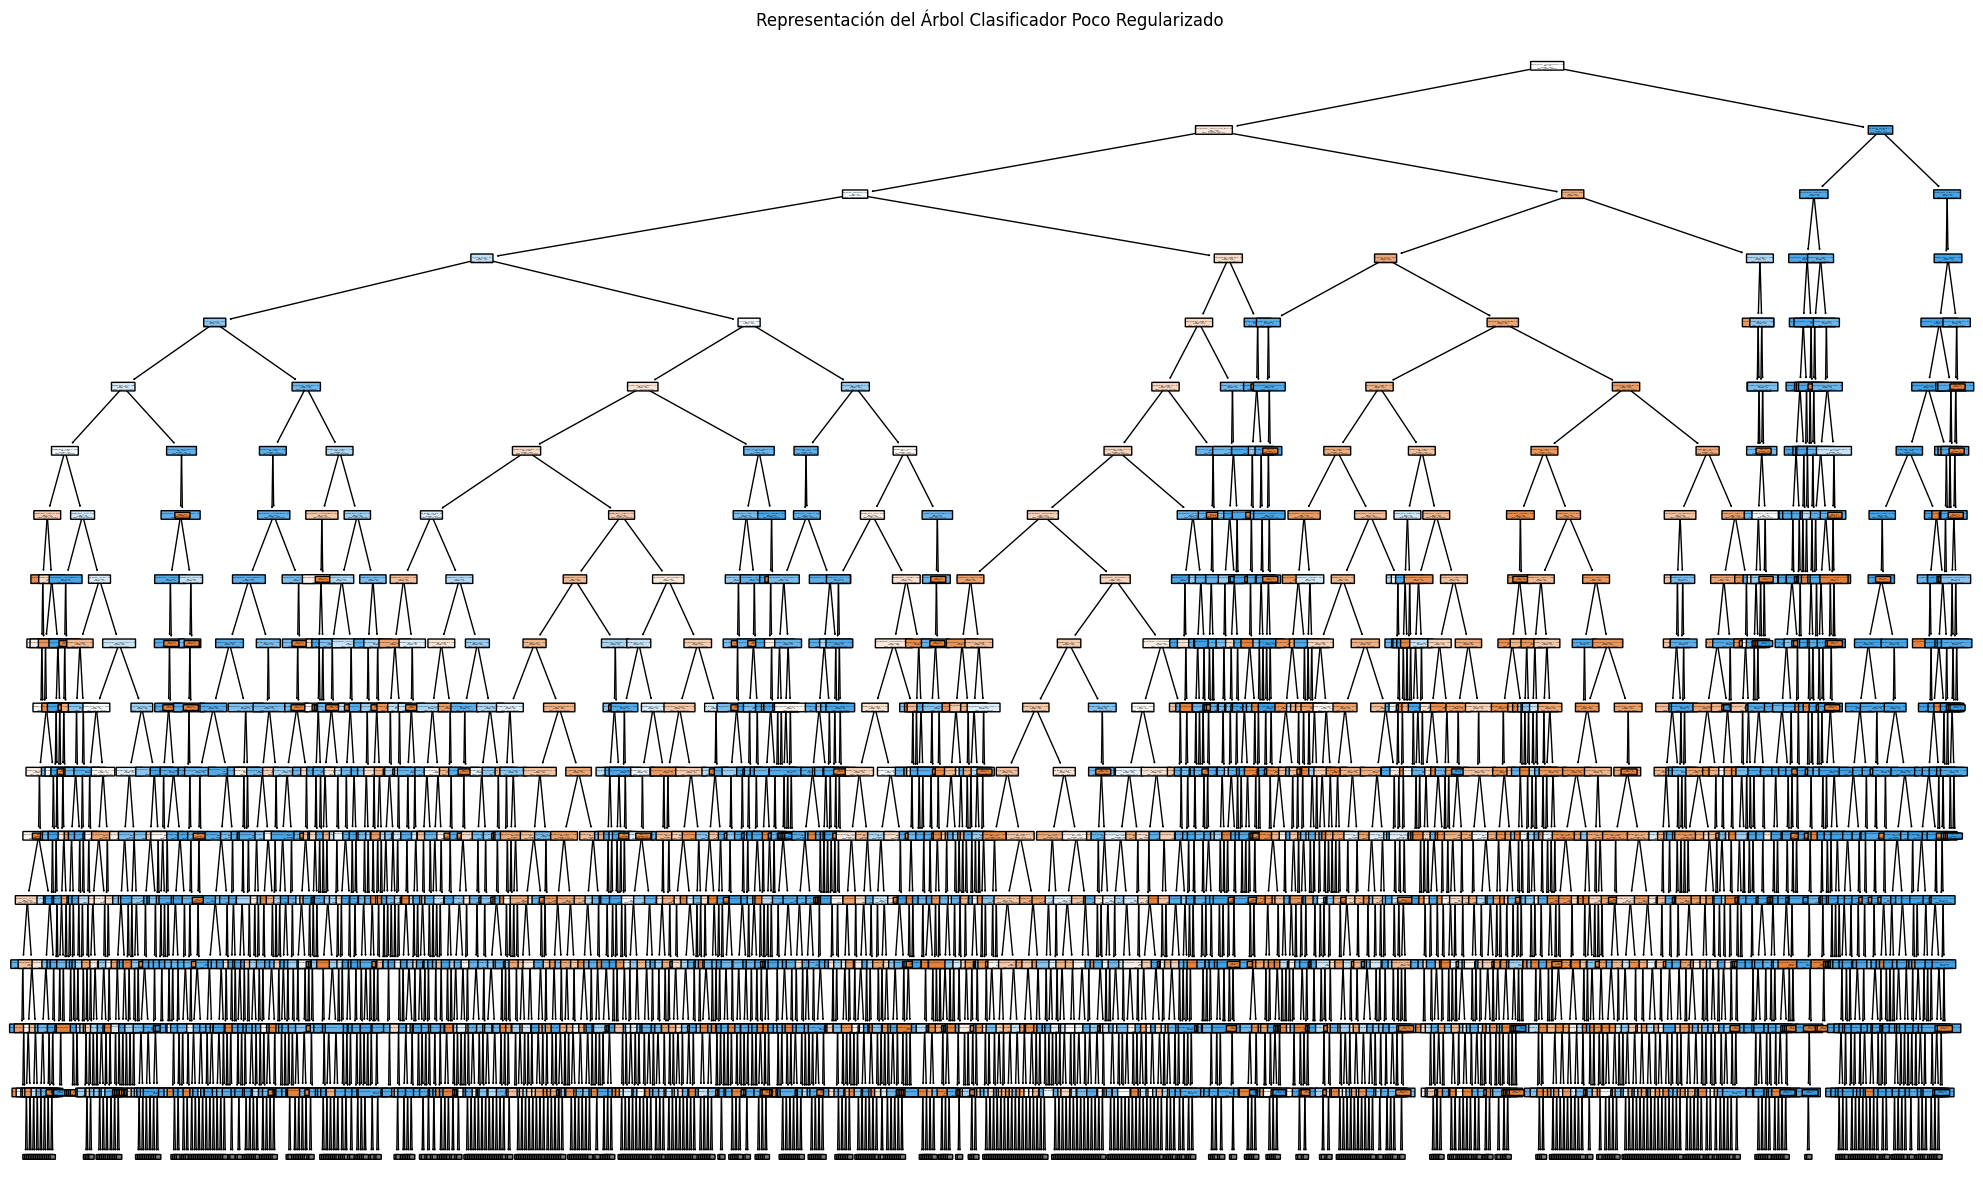

In [290]:
feature_names_out = processor.get_feature_names_out()
nombres = modelo_poco_regularizado.classes_.astype(str) # type: ignore

plt.figure(figsize=(25, 15))
plot_tree(
    modelo_no_regularizado,
    filled=True,
    rounded=True,
    feature_names=feature_names_out, # type: ignore
    class_names=nombres, # type: ignore
    max_depth= 16
)
plt.title('Representación del Árbol Clasificador Poco Regularizado')
plt.show()




---


Todavia sigue siendo extenso el arbol de decisión (por eso es enredado el grafico) asi que peude haber presencia de sobreajuste pero de menor manera (F1 score en base prueba mejoró)


---


### Pregunta 1.9

Entrene un árbol clasificador con profundad máxima del árbol igual a 8. Llamaremos a este, "modelo regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?


In [291]:
modelo_regularizado = DecisionTreeClassifier(
    max_depth=8,
    class_weight='balanced',
    random_state=123
)

modelo_regularizado.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=123)

In [292]:
y_test_pred = modelo_regularizado.predict(X_test) #predigo con train
f1_test_regularizado = f1_score(y_test, y_test_pred, pos_label='yes')

print(f1_test_regularizado) #43%

0.4355317884729649


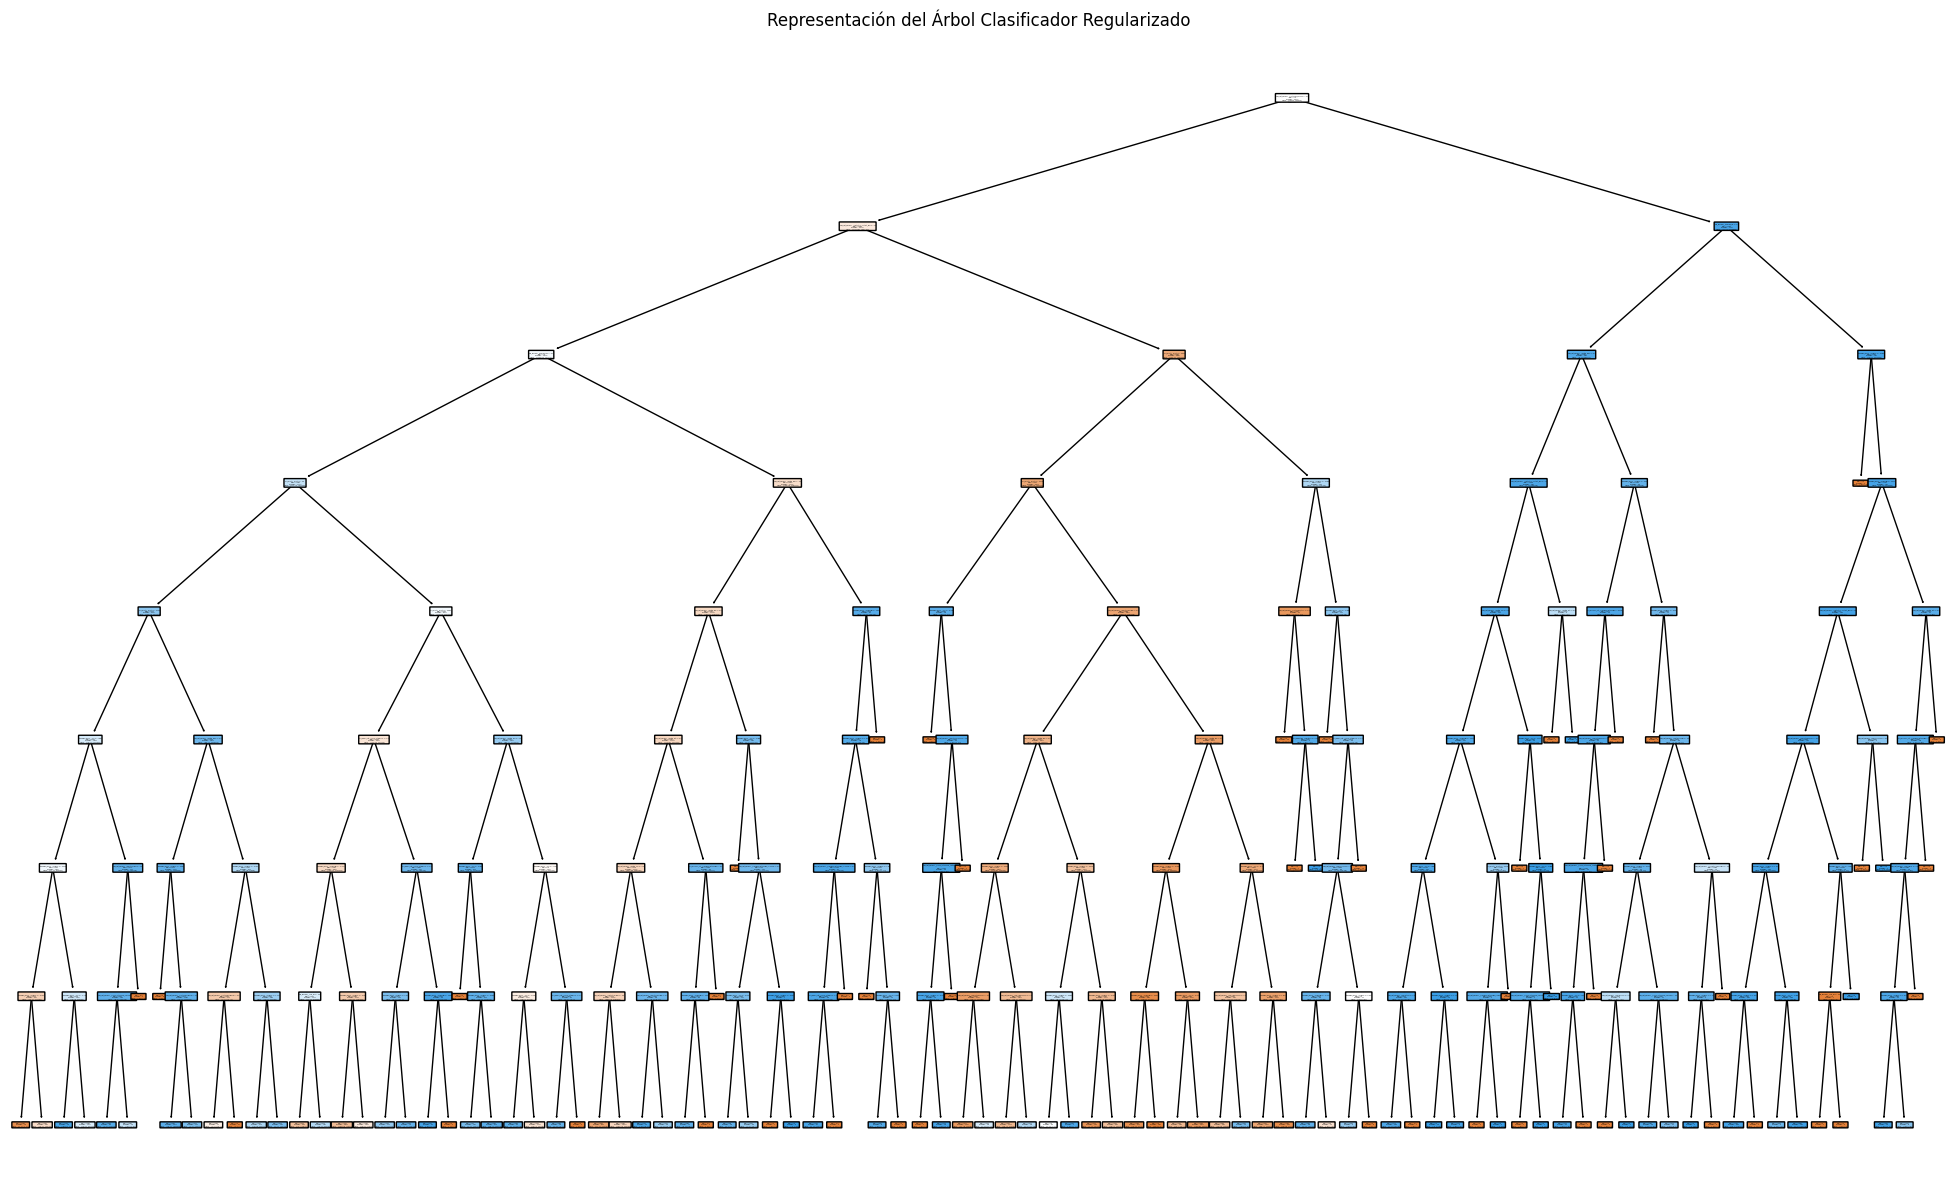

In [293]:
feature_names_out = processor.get_feature_names_out()
nombres = modelo_regularizado.classes_.astype(str) # type: ignore

plt.figure(figsize=(25, 15))
plot_tree(
    modelo_regularizado,
    filled=True,
    rounded=True,
    feature_names=feature_names_out, # type: ignore
    class_names= nombres, # type: ignore
    max_depth= 8
)
plt.title('Representación del Árbol Clasificador Regularizado')
plt.show()




---


Tiene menor overfitting, y el F1 Score es más alto. Tradeoff entre capacidad de predicción y rendimiento.


---


### Pregunta 1.10

Entrene 20 árboles de clasificación. Cada uno de ellos debe estar entrenado fijando la profundidad máxima del árbol `max_depth` igual a $n \in [1,20]$. Obtenga el $F_1\ Score$ de cada árbol con la base de entrenamiento y la base de prueba.

Grafique en una misma figura $F_1\ Score$ de entrenamiento contra $n$ y $F_1\ Score$ de prueba contra $n$ (Eje X = $n$). ¿Cuál parece ser el parámetro óptimo $n^*$ para el árbol? ¿Qué puede decir sobre el parámetro sobre _overfitting_ y generalización?

In [294]:
f1_scores_train = []
f1_scores_test = []
depths = range(1, 21)

for n in depths:
    model_n = DecisionTreeClassifier(
        max_depth=n,
        class_weight='balanced',
        random_state=123
    )

    model_n.fit(X_train, y_train)
    y_train_pred_n = model_n.predict(X_train)
    f1_train_n = f1_score(y_train, y_train_pred_n, pos_label='yes')

    y_test_pred_n = model_n.predict(X_test)
    f1_test_n = f1_score(y_test, y_test_pred_n, pos_label='yes')

    f1_scores_train.append(f1_train_n)
    f1_scores_test.append(f1_test_n)


print(f1_scores_train)
print(f1_scores_test)

[0.2857702861622893, 0.2536450388449395, 0.3086110115848561, 0.3133103366242417, 0.38786645704244893, 0.4191422488086789, 0.4256982175197789, 0.4379219254476079, 0.4490194165284418, 0.45035198221563544, 0.4456577375874424, 0.46380070928120404, 0.47657387580299787, 0.49231291939182875, 0.5150992234685073, 0.5242799037104673, 0.5447302904564315, 0.5764695756949824, 0.6075302001587162, 0.6429414434861552]
[0.2936320754716981, 0.25492094223943207, 0.3191754043006931, 0.32104890148830617, 0.4051992088160497, 0.4438322620140802, 0.42807625649913345, 0.4355317884729649, 0.42629716981132076, 0.4139275766016713, 0.39359504132231404, 0.3862571577303488, 0.3724633958386848, 0.36565239814337286, 0.35697583787996884, 0.3408408408408408, 0.33124843632724543, 0.3227979274611399, 0.314785373608903, 0.30268199233716475]


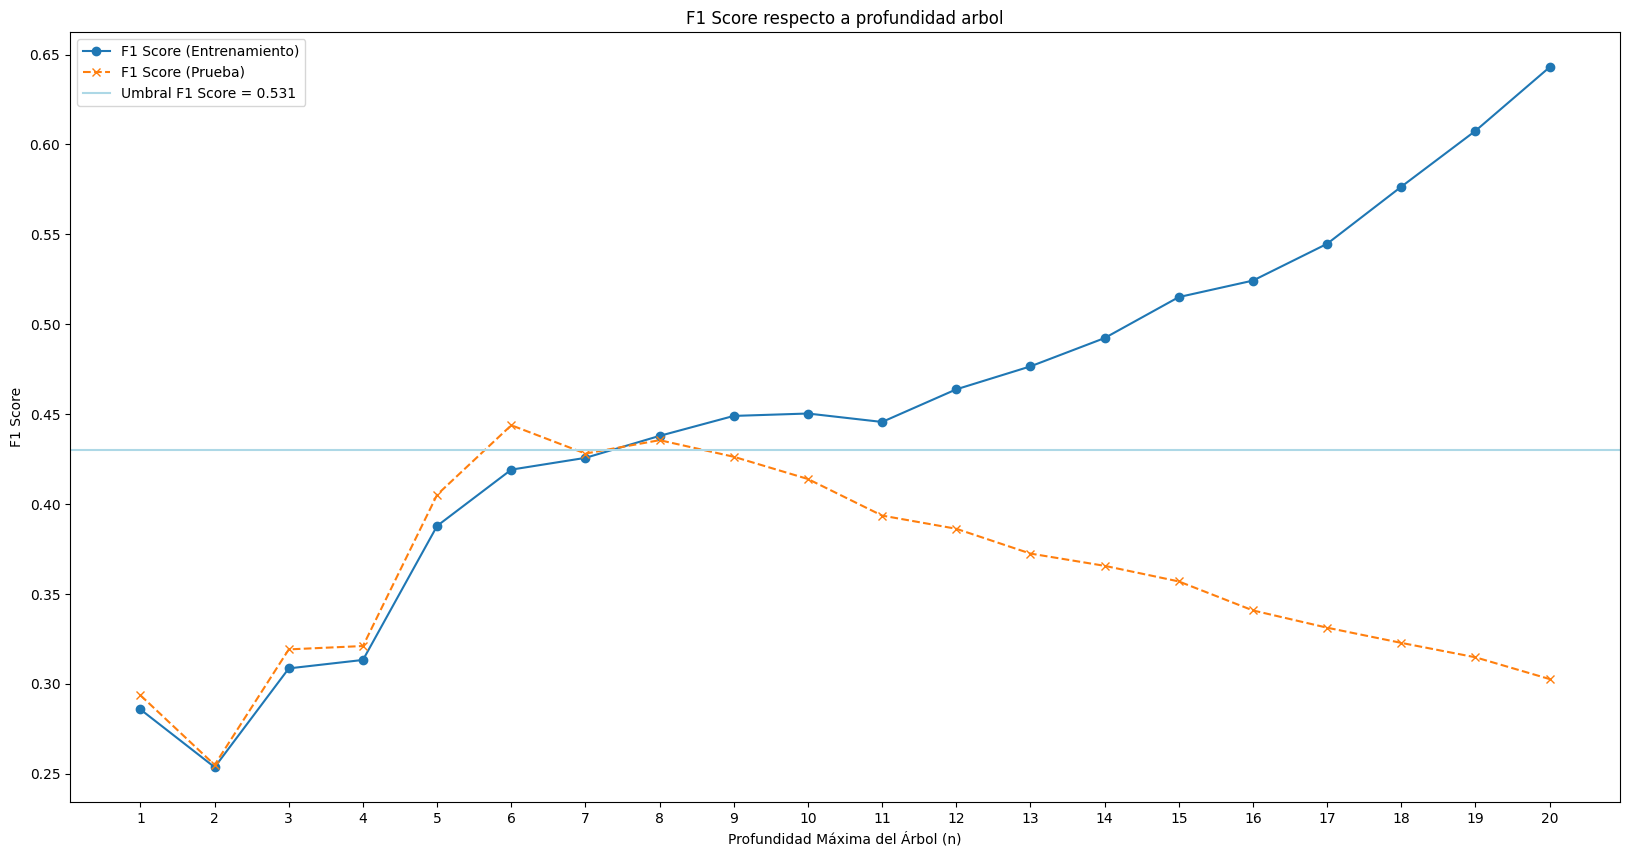

In [295]:
plt.figure(figsize=(20, 10))

plt.plot(depths, f1_scores_train, marker='o', linestyle='-',
        label='F1 Score (Entrenamiento)')
plt.plot(depths, f1_scores_test, marker='x', linestyle='--',
         label='F1 Score (Prueba)')

plt.axhline(y=0.43, color= 'lightblue', label='Umbral F1 Score = 0.531')

plt.title('F1 Score respecto a profundidad arbol')
plt.xlabel('Profundidad Máxima del Árbol (n)')
plt.ylabel('F1 Score')
plt.xticks(depths) # Mostrar todos los valores enteros en el eje X
plt.legend() # Mostrar la leyenda para identificar las líneas
plt.show()

#n = 6 es la mejor opcion

In [296]:
n_optimo=6
model_6 = DecisionTreeClassifier(
    max_depth=n_optimo,
    class_weight='balanced',
    random_state=123
    )

model_6.fit(X_train, y_train)
y_test_pred_n = model_6.predict(X_test)
f1_test_n = f1_score(y_test, y_test_pred_n, pos_label='yes')

print(f1_test_n)

0.4438322620140802


In [297]:
# Calcular Precision
precision_n = precision_score(y_test, y_test_pred_n, pos_label='yes')
recall_n = recall_score(y_test, y_test_pred_n, pos_label='yes')

print(f"Precision del modelo en la base de prueba: {precision_n}")
print(f"Recall del modelo en la base de prueba: {recall_n}")

Precision del modelo en la base de prueba: 0.37275064267352187
Recall del modelo en la base de prueba: 0.5484114977307111





---

El mejor n es igual a 6 (alcanza un F1 Score de 44,4% aprox)

Cuando añado más profundidad a un árbol, al principio aumenta la generalización hacia el test pero luego el modelo "se aprende de memoria los datos de entrenamiento" y falla al ver uno nuevo. Es decir, luego de cierto punto es dificil "aprender" marginalmente más y el modelo se sobreajusta y termina siendo peor para generalizar


---


### Pregunta 1.11

En esta pregunta deberá entrenar _Random Forest Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Realice _Cross Validation_ con un _folding_ con `K=5` y calcule $F_1\ Score$ de todas las posibles combinaciones de los siguientes parámetros:

- `n_estimators = {100, 1000}`
- `max_depth = {10, 50, 100}`
- `min_samples_leaf = {2, 4}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta. Finalmente, reporte el $F_1\ Score$ con la muestra de prueba.

Cuando realice _Cross Validation_ y cuando entrene el modelo final, asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `RandomForestClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.



In [298]:
combinaciones = {
    'n_estimators': [100, 1000],
    'max_depth': [10, 50, 100],
    'min_samples_leaf': [2, 4]
}

rf_base = RandomForestClassifier(class_weight='balanced', random_state=123)

f1_scorer = make_scorer(f1_score, pos_label='yes')

In [299]:
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=combinaciones,
    cv=5,
    scoring=f1_scorer,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   1.8s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   1.9s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   2.0s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   2.0s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   2.0s
[CV] END .max_depth=10, min_samples_leaf=4, n_estimators=100; total time=   2.0s
[CV] END .max_depth=10, min_samples_leaf=4, n_estimators=100; total time=   2.1s
[CV] END .max_depth=10, min_samples_leaf=4, n_estimators=100; total time=   2.0s
[CV] END .max_depth=10, min_samples_leaf=4, n_estimators=100; total time=   2.0s
[CV] END .max_depth=10, min_samples_leaf=4, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=2, n_estimators=1000; total time=  17.8s
[CV] END max_depth=10, min_samples_leaf=2, n_est

/Users/catamege/Desktop/Uni/9vo semestre/Machine learning/Tarea2-Mege-Lantadilla/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=100, min_samples_leaf=2, n_estimators=1000; total time=  31.7s
[CV] END max_depth=100, min_samples_leaf=2, n_estimators=1000; total time=  32.5s
[CV] END max_depth=100, min_samples_leaf=2, n_estimators=1000; total time=  32.7s
[CV] END max_depth=100, min_samples_leaf=4, n_estimators=1000; total time=  27.7s
[CV] END max_depth=100, min_samples_leaf=4, n_estimators=1000; total time=  27.7s
[CV] END max_depth=100, min_samples_leaf=4, n_estimators=1000; total time=  28.0s
[CV] END max_depth=100, min_samples_leaf=4, n_estimators=1000; total time=  24.5s
[CV] END max_depth=100, min_samples_leaf=4, n_estimators=1000; total time=  22.4s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [10, 50, 100], 'min_samples_leaf': [2, 4],
                         'n_estimators': [100, 1000]},
             scoring=make_scorer(f1_score, response_method='predict', pos_label=yes),
             verbose=2)

In [300]:
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
print(f"Mejor F1 Score promedio de CV: {grid_search.best_score_}")

Mejores parámetros encontrados: {'max_depth': 50, 'min_samples_leaf': 4, 'n_estimators': 1000}
Mejor F1 Score promedio de CV: 0.45220030413764495


In [301]:
rf_optimo = grid_search.best_estimator_
rf_optimo.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=50,
                       min_samples_leaf=4, n_estimators=1000, random_state=123)

In [302]:
y_test_pred_rf_optimo = rf_optimo.predict(X_test)
f1_test_rf_optimo = f1_score(y_test, y_test_pred_rf_optimo, pos_label='yes')

print(f1_test_rf_optimo)

0.47560975609756095


In [303]:
precision_rf_optimo = precision_score(y_test, y_test_pred_rf_optimo, pos_label='yes')  # noqa: E501
recall_rf_optimo = recall_score(y_test, y_test_pred_rf_optimo, pos_label='yes')

print(f"Precision del modelo en la base de prueba: {precision_rf_optimo}")
print(f"Recall del modelo en la base de prueba: {recall_rf_optimo}")

Precision del modelo en la base de prueba: 0.4306748466257669
Recall del modelo en la base de prueba: 0.5310136157337367


### Pregunta 1.12

En esta pregunta deberá entrenar _XGBpost Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Repita el ejercicio de _Cross Validation_ anterior, pero está vez evaluando:

- `n_estimators = {100, 1000}`
- `max_depth = {5, 50, 100}`
- `learning_rate = {0.05, 0.1, 0.5}`
- `max_leaves= {2, 4, 10}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta, reportando el $F_1\ Score$ con la muestra de prueba.

Asegúrese de que sus modelos sean capaces de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `XGBClassifier()` (parámetros de inicialización): https://xgboost.readthedocs.io/en/latest/python/python_api.html.


In [304]:
le = LabelEncoder()
y_target_encoded = le.fit_transform(df['y'])

In [305]:
balance = 0.5
is_balanced = y_target_encoded.min() > balance # type: ignore
print(is_balanced)

False


In [306]:
X_pipeline = df.drop(columns=['y', 'pdays', 'log(pdays)', 'previous',
                              'log(previous)','day_of_week', 'duration'])

X_processed = processor.fit_transform(X_pipeline)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed,
    y_target_encoded,
    test_size=0.25,
    random_state=123,
    stratify=y_target_encoded
)

In [307]:
y_train

array([0, 0, 1, ..., 0, 0, 0], shape=(33905,))

In [308]:
negativo = pd.Series(y_train).value_counts()[0]
positivo = pd.Series(y_train).value_counts()[1]
pesos = negativo / positivo

In [309]:
combinaciones = {
    'n_estimators': [100, 1000],
    'max_depth': [5, 50, 100],
    'learning_rate': [0.05, 0.1, 0.5],
    'max_leaves': [2, 4, 10]
}

f1_scorer = make_scorer(f1_score, pos_label=1)

In [310]:
xgb_model_base = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=pesos,
    random_state=123,
    n_jobs=-1
)

In [311]:
grid_search = GridSearchCV(
    estimator=xgb_model_base,
    param_grid=combinaciones,
    cv=5,
    scoring=f1_scorer,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END learning_rate=0.05, max_depth=5, max_leaves=2, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, max_leaves=2, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, max_leaves=2, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, max_leaves=2, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, max_leaves=4, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, max_leaves=4, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, max_leaves=4, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, max_leaves=4, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, max_leaves=4, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, max_leaves=2, n_estimators=100; total time=   0.2s
[CV] END

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'max_depth': [5, 50, 100], 'max_leaves': [2, 4, 10],
                         'n_estimators': [100, 1000]},
             scoring=make_scorer(f1_score, response_method='predict', pos_label=1),
             verbose=2)

In [312]:
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
print(f"Mejor F1 Score promedio de CV: {grid_search.best_score_}")

Mejores parámetros encontrados: {'learning_rate': 0.1, 'max_depth': 5, 'max_leaves': 10, 'n_estimators': 100}
Mejor F1 Score promedio de CV: 0.41732633287592347


In [313]:
xgb_optimo = grid_search.best_estimator_
xgb_optimo.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, ...)

In [314]:
y_test_pred_xgb_optimo = xgb_optimo.predict(X_test)
f1_test_xgb_optimo = f1_score(y_test, y_test_pred_xgb_optimo, pos_label=1)

print(f1_test_xgb_optimo)

0.4341286307053942


In [315]:
precision_xgb_optimo = precision_score(y_test, y_test_pred_xgb_optimo, pos_label=1)  # noqa: E501
recall_xgb_optimo = recall_score(y_test, y_test_pred_xgb_optimo, pos_label=1)

print(f"Precision del modelo en la base de prueba: {precision_xgb_optimo}")
print(f"Recall del modelo en la base de prueba: {recall_xgb_optimo}")

Precision del modelo en la base de prueba: 0.3303078137332281
Recall del modelo en la base de prueba: 0.6331316187594553


### Pregunta 1.13

Entrene un modelo _Naïve Bayes_. Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `GaussianNB()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.


Despliege el $F_1\ Score$ del modelo sobre la base de prueba.

In [316]:
smote = SMOTE(random_state=123)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train) # type: ignore

In [317]:
gnb_model = GaussianNB()
gnb_model.fit(X_train_balanced, y_train_balanced) # type: ignore

GaussianNB()

In [318]:
y_test_pred_gnb = gnb_model.predict(X_test)
f1_test_gnb = f1_score(y_test, y_test_pred_gnb, pos_label=1)

print(f1_test_gnb)

0.3651211801896733


In [319]:
precision_gnb = precision_score(y_test, y_test_pred_gnb, pos_label=1)
recall_gnb = recall_score(y_test, y_test_pred_gnb, pos_label=1)

print(f"Precision del modelo en la base de prueba: {precision_gnb}")
print(f"Recall del modelo en la base de prueba: {recall_gnb}")

Precision del modelo en la base de prueba: 0.2801131770412288
Recall del modelo en la base de prueba: 0.5242057488653555




---



## Análisis Comparativo de Modelos de Clasificación


### Pregunta 1.14

Evalúe y compare el desempeño de los modelos teniendo en cuenta la naturaleza del conjunto de datos. ¿Cómo afectó el desbalance a cada modelo? ¿Qué modelo manejó mejor el balance o desbalance de clases y cuáles son sus conclusiones generales sobre su rendimiento comparado?

Para que la comparación sea clara, es útil indicar qué métricas de evaluación utilizo para comparar los modelos (por ejemplo, F1-score, precisión, recall, AUC, etc.).

In [320]:
model_performance = {
    "Modelo": [
        "Decision Tree (Profundidad Óptima)",
        "Random Forest (Óptimo)",
        "XGBoost (Óptimo)",
        "Naïve Bayes"
    ],
    "F1 Score (Test)": [
        f1_test_n,
        f1_test_rf_optimo,
        f1_test_xgb_optimo,
        f1_test_gnb
    ],
    "Precision": [
        precision_n,
        precision_rf_optimo,
        precision_xgb_optimo,
        precision_gnb
    ],
    'Recall': [
        recall_n,
        recall_rf_optimo,
        recall_xgb_optimo,
        recall_gnb
    ]
}

df_total = pd.DataFrame(model_performance)
print(df_total)

                               Modelo  F1 Score (Test)  Precision    Recall
0  Decision Tree (Profundidad Óptima)         0.443832   0.372751  0.548411
1              Random Forest (Óptimo)         0.475610   0.430675  0.531014
2                    XGBoost (Óptimo)         0.434129   0.330308  0.633132
3                         Naïve Bayes         0.365121   0.280113  0.524206





---

El modelo con el F1 Score más alto fue el random forest y sería el más adecuado para la campaña pues optimiza los falsos negativos y falsos positivos. Esto se da porque promedia las predicciones de muchos árboles y así reduce la varianza del modelo. Esto le permite generalizar mucho mejor a datos no vistos que un solo árbol.

**Impacto del Desbalance y Manejo:** Todos los modelos se entrenaron con datos divididos usando `stratify=y_target_encoded`, asegurando que la proporción de clases se mantuviera en entrenamiento y prueba.
- Para Decision Tree y Random Forest, se usó `class_weight='balanced'` para que el modelo asignara un mayor peso a los errores de clasificación de la clase minoritaria.
- Para XGBoost, se usó `scale_pos_weight` calculado como la proporción de clases negativa/positiva en el entrenamiento, logrando un balanceo de pesos.
- Para Naïve Bayes, se aplicó SMOTE al conjunto de entrenamiento para balancear físicamente las clases antes de entrenar el modelo.

**Conclusiones Generales:** La comparación de los Decision Trees demuestra claramente la importancia de la regularización para combatir el sobreajuste y mejorar la capacidad de generalización a datos no vistos. Los modelos de ensamble (Random Forest, XGBoost) suelen superar a los modelos individuales (Decision Tree simple) porque combinan las predicciones de múltiples modelos para reducir errores y mejorar la robustez. 

---


# KMeans & PCA

La guerra comercial desatada levanta un montón de preguntas de interés en economía. Una de estas es: ¿Qué países sufrirán de forma similar las consecuencias de esta? ¿Quiénes serían ganadores? ¿Quienes serían perdedores?

En esta parte exploraremos el aporte que los métodos de Clustering de Machine Learning pueden hacer a la respuesta de esta cuestión. Nos enfocaremos en variables relacionadas al comercio exterior para determinar similitud entre grupos de países. Más específicamente, en variables relacionadas a las exportaciones.

Para esto, considere las siguientes variables que describen el perfil exportador de cada país:

- GDP growth (annual %)
- Agricultural raw materials exports (% of merchandise exports)
- Computer, communications and other services (% of commercial service exports)
- Exports of goods and services (% of GDP)
- Food exports (% of merchandise exports)
- Fuel exports (% of merchandise exports)
- High-technology exports (% of manufactured exports)
- ICT service exports (% of service exports, BoP)
- Insurance and financial services (% of service exports, BoP)
- International tourism, receipts (% of total exports)
- Manufactures exports (% of merchandise exports)
- Merchandise exports to high-income economies (% of total merchandise exports)
- Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)
- Ores and metals exports (% of merchandise exports)
- Taxes on exports (% of tax revenue)
- Transport services (% of commercial service exports)


La idea será determinar similitud entre países y las variables qué son más relevantes a la hora de determinarla.

Debido a que 2023 es el año reciente con una mayor riqueza de datos, y debido a que nos interesan cambios respecto al _status quo_ en el contexto actual, trabajaremos con datos sólo de aquel año.

Database Source: World bank & Trade Analysis Information System.



### Pregunta 2.0

Cargue la base de datos disponible en el siguiente link: https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.cs.

En el siguiente link podrá encontrar información adicional sobre el _dataset_ por si lo llega a necesitar: https://github.com/olherreragz/EAE3709-2025-1/blob/main/T2_data/Series_Metadata.csv.

Elimine las columnas `"Series Code"` y `"Country Code"`. Luego, transforme su _dataframe_ de formato _Long_ a _Wide_. Su _dataframe_ final deberá contener una columna que indique el nombre del país y columnas que indiquen la medida de exportación correspondiente:

`<Country>, <SeriesName1>, <SeriesName2> ....`



![Long to Wide Format](https://tavareshugo.github.io/r-intro-tidyverse-gapminder/fig/07-data_shapes.png)




### Pregunta 2.1

Debido a que la pregunta de interés es sobre identificación de grupos de países, elime filas donde `Country Name` sea igual a cualquiera de los siguientes valores:

- "Africa Eastern and Southern"  
- "Africa Western and Central"  
- "Arab World"  
- "Caribbean small states"  
- "Central Europe and the Baltics"  
- "Early-demographic dividend"  
- "East Asia & Pacific"  
- "East Asia & Pacific (IDA & IBRD countries)"  
- "East Asia & Pacific (excluding high income)"  
- "Euro area"  
- "Europe & Central Asia"  
- "Europe & Central Asia (IDA & IBRD countries)"  
- "Europe & Central Asia (excluding high income)"  
- "European Union"  
- "Fragile and conflict affected situations"  
- "Heavily indebted poor countries (HIPC)"  
- "High income"  
- "IBRD only"  
- "IDA & IBRD total"  
- "IDA blend"  
- "IDA only"  
- "IDA total"  
- "Late-demographic dividend"  
- "Latin America & Caribbean"  
- "Latin America & Caribbean (excluding high income)"  
- "Latin America & the Caribbean (IDA & IBRD countries)"  
- "Least developed countries: UN classification"  
- "Low & middle income"  
- "Low income"  
- "Lower middle income"  
- "Middle East & North Africa"  
- "Middle East & North Africa (IDA & IBRD countries)"  
- "Middle East & North Africa (excluding high income)"  
- "Middle income"  
- "North America"  
- "Not classified"  
- "OECD members"  
- "Other small states"  
- "Pacific island small states"  
- "Post-demographic dividend"  
- "Pre-demographic dividend"  
- "Small states"  
- "South Asia"  
- "South Asia (IDA & IBRD)"  
- "Sub-Saharan Africa"  
- "Sub-Saharan Africa (IDA & IBRD countries)"  
- "Sub-Saharan Africa (excluding high income)"  
- "Upper middle income"  
- "World"




### Pregunta 2.2

Reemplace todos los valores `".."` por `NA`. Luego, transforme las columnas a variables numéricas y despliegue estadísticas descriptivas.


### Pregunta 2.3

Grafique la distribución empírica de todas las variables numéricas del dataset. Comente sobre cada una de ellas.




---


*Escriba* su respuesta en esta celda...


---


## Missing Values

### Pregunta 2.4

Realice análisis de valores vacíos y tratamiento de estos. Se premiará mantener el mayor número de observaciones posibles bajo criterios razonables. Luego de esta pregunta no deben quedar nulos en el _dataframe_ a utilizar.


## Outliers

### Pregunta 2.5

Realice análisis de datos _outliers_. De ser necesario aplique un procesamiento de outliers, de no ser necesario justifique.

Se premiará el buen criterio fundamentado.




---


*Escriba* su respuesta en esta celda...


---


## Feature Engineering


### Pregunta 2.6

Realice _feature engineering_ de las variables numéricas (para luego entrenar un modelo _K-Means_ con estas). Realice los ajustes que estime conveniente, pero su tratamiento debe incluir por lo menos estandarización de las variables.

Más adelante se le pedirá comentar sobre los resultados de sus modelos, por lo que considere que sus decisiones podrían condicionar futuras preguntas.



## K-Means

### Pregunta 2.7

Considerando el dataframe completo (todas sus columnas atributos), determine el número óptimo de clusters mediante el "Elbow method". Considere un rango $k \in [1, 30]$. Describa el comportamiento observado de la curva.






---


*Escriba* su respuesta en esta celda...


---


### Pregunta 2.8

Un problema habitual del modelo _K-Means_ es que pierde desempeño a mayor dimensionalidad.

En esta pregunta defina **por lo menos 5 combinaciones de columnas** (mínimo 2 columnas y máximo 4). Para cada combinación determine el número óptimo de clusters mediante el "Elbow method" considerando $k \in [1, 30]$.

Un posible enfoque para lo anterior es tomar un _approach_ estadístico y escoger variables que empíricamente muestran mayores indicios de poder diferenciador entre las observaciones. De todas formas, recuerde que la pregunta de interés es "¿qué países se verán expuestos de forma similar a la guerra comercial?". En este sentido, es altamente recomendable escoger variables con una mayor relación al fenómeno de la guerra comercial, ya que puede ser útil para discernir de qué forma podría verse expuesto cada grupo.


---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.9

Escoja la combinación de columnas que considera adecuada emplear, refiriéndose tanto al comportamiento observado de la curva, como al nivel de la métrica empleada al que se alcanza la convergencia.

Estime el modelo con $k$ óptimo y las columnas escogidas. Visualice los grupos graficando _scatterplots_. Considere gráficos en 3 dimensiones si su modelo posee 3 o más variables.

Describa en qué se diferencian los grupos encontrados y de qué manera le podría afectar la guerra comercial a cada uno. Liste una pequeña muestra representativa de los países que contiene cada grupo.


---


*Escriba* su respuesta en esta celda...


---

## PCA

_PCA_ es una técnica de reducción de dimensionalidad que nos permite trabajar sobre un set de componentes principales ortogonales (mayor facilidad para los modelos a la hora de detectar patrones), además de permitirnos visualizar espacios multidimensionales, quedándonos sobre el espacio de PCA.



### Pregunta 2.10

Utilizando todas las variables originales y $k$ óptimo escogido en la pregunta anterior, estime un PCA con 2 componentes principales. Luego, estime un modelo _K-Means_ sobre los componentes principales obtenidos. Grafique las observaciones en un _scatterplot_ de 2 dimensiones. Coloree los puntos usando los label de los clusters obtenidos.

¿Cuáles son las principales diferencias entre los grupos? Encuentre las variables más definitivas a la hora de agrupar países con los 2 primeros componentes principales.


---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.11


Repita lo anterior  (descripción incluida), pero con 3 componentes principales y un _scatterplot_ en 3 dimensiones.

---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.12

Otro de los usos de los más comúnes de _PCA_, además de _feature engineering_, es la visualización. En esta sección utilizaremos _PCA_ para confirmar visualmente que estamos clusterizando países similares.

Usando el diccionario en la celda de abajo agrega una columna de continente al _dataframe_ de trabajo.

In [321]:
country_continent_mapping = {
    'Albania': 'Europe',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America', # Usually classified with the Caribbean
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahrain': 'Asia',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Cabo Verde': 'Africa',
    'Canada': 'North America',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Congo Dem. Rep.': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa', # Transcontinental, but usually Africa
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Guatemala': 'North America',
    'Honduras': 'North America',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia', # Transcontinental, mostly Asia
    'Kenya': 'Africa',
    'Korea Rep.': 'Asia',
    'Latvia': 'Europe',
    'Lesotho': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macao': 'Asia',
    'Malaysia': 'Asia',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Samoa': 'Oceania',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Singapore': 'Asia',
    'Slovak Republic': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Tunisia': 'Africa',
    'Turkiye': 'Asia', # Transcontinental, mostly Asia
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Zambia': 'Africa'
}


### Pregunta 2.13

Realice un PCA de 2 componentes principales, grafique un _scatterplot_ del resultado y coloree cada punto según su continente. ¿Que se obserba?


---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.14

Genera el mismo gráfico anterior, pero ahora coloree los puntos del scatterplot usando los clusters de un KMeans de 3 clústers y `random_state=42`. Describa los clusters según el gráfico.



---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.15

¿Cual es la proporcion de cada cluster por continente?


### Pregunta 2.16

¿Cuál es la característica numérica más alta en magnitud por cluster (usando sus centroides)? ¿Cuál es su signo? ¿Como nos ayuda a interpretar los clusters? ¿Que podemos concluir de cada uno de estos clusters en contexto de la guerra comercial?


---


*Escriba* su respuesta en esta celda...


---